<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

In [25]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Next, we can use the pyplot library to draw the image so we know what it looks like.

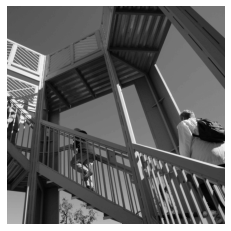

In [26]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

In [27]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array. 

In [28]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]] # Filters vertical lines!
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # Filters horizontal lines!

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

**Note:** The loop below starts at 1 and ends at (size-1) because you need a margin of 1 for the filter! For example, the top left corner won't have another pixel to its left or on top to multiply with the filter.

In [32]:
for x in range(1,size_x-1): # Leave margin of 1 for the border.
    for y in range(1,size_y-1): # Leave margin of 1 for the border.
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        print(convolution)
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

5.0
4.0
0.0
0.0
0.0
-4.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
-2.0
-4.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
16.0
0.0
-4.0
2.0
-1.0
-5.0
2.0
3.0
-1.0
0.0
1.0
-1.0
-1.0
4.0
0.0
-3.0
0.0
0.0
0.0
0.0
4.0
5.0
-4.0
-5.0
3.0
-3.0
-3.0
6.0
0.0
1.0
4.0
-4.0
0.0
12.0
4.0
-4.0
-2.0
-1.0
2.0
1.0
0.0
0.0
0.0
3.0
3.0
-3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
6.0
1.0
2.0
4.0
1.0
0.0
3.0
2.0
0.0
0.0
4.0
-8.0
-16.0
8.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.0
1.0
2.0
-1.0
0.0
0.0
0.0
0.0
4.0
9.0
4.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
9.0
6.0
1.0
-4.0
-4.0
7.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
5.0
0.0
-1.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
8.0
-3.0
-3.0
0.0
6.0
9.0
1.0
-3.0
1.0
-1.0
-3.0
-6.0
-22.0
-78.0
-47.0
15.0
11.0
-3.0
4.0
9.0
-5.0
-19.0
-8.0
-3.0
-2.0


7.0
13.0
17.0
15.0
1.0
-12.0
-9.0
-13.0
-11.0
0.0
10.0
9.0
3.0
4.0
-3.0
1.0
4.0
-2.0
0.0
4.0
5.0
-3.0
-5.0
0.0
0.0
0.0
0.0
0.0
-1.0
-2.0
33.0
115.0
174.0
139.0
49.0
4.0
2.0
0.0
0.0
3.0
0.0
-3.0
-1.0
1.0
3.0
5.0
7.0
2.0
-2.0
0.0
0.0
-2.0
-1.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
-2.0
3.0
11.0
5.0
-2.0
-1.0
7.0
2.0
-11.0
-11.0
3.0
10.0
3.0
1.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-1.0
-1.0
1.0
1.0
1.0
0.0
2.0
5.0
4.0
3.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
-1.0
-2.0
0.0
0.0
-1.0
0.0
8.0
9.0
4.0
1.0
-4.0
0.0
4.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
8.0
0.0
-7.0
-2.0
2.0
5.0
4.0
5.0
-2.0
-8.0
3.0
5.0
-5.0
-5.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
10.0
3.0
-2.0
-3.0
-3.0
-6.0
3.0
16.0
4.0
-3.0
1.0
0.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
7.0
3.0
-1.0
-6.0
-5.0
5.0
6.0
4.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
10.0
-1.0
-10.0
-3.0
0.0
0.0
4.0
6.0
4.0
1.0
-4.0
7.0
8.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.0
-37.0
-63.0
-40.0
15.0
30.0
1.0
-2.0
1.0
-11.0
-6.0
3.0
8.0
1.0
11.0
-12.0
-2.0
-10.0
-25.0
-9.0
-33.0
15.0
-36.0
-22.0
73.0
31.0
-91.0
-201.0
-96.0
15.0
6.0
-45.0
-104.0
-60.0
11.0
9.0
-14.0
-3.0
2.0
-1.0
4.0
5.0
3.0
3.0
6.0
0.0
-4.0
-2.0
-1.0
5.0
8.0
5.0
1.0
-1.0
-4.0
-2.0
3.0
0.0
-3.0
-1.0
-3.0
-4.0
-2.0
0.0
-1.0
-3.0
1.0
3.0
6.0
2.0
-6.0
-2.0
-1.0
1.0
3.0
-1.0
-3.0
-6.0
3.0
10.0
-1.0
-5.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
0.0
0.0
4.0
6.0
2.0
-4.0
-3.0
-3.0
-10.0
-7.0
0.0
3.0
5.0
7.0
3.0
-3.0
-3.0
-2.0
-5.0
-3.0
2.0
11.0
14.0
-3.0
-6.0
1.0
-3.0
-4.0
-7.0
-9.0
-2.0
1.

-5.0
0.0
-5.0
-4.0
1.0
2.0
1.0
-5.0
-10.0
-1.0
3.0
-5.0
-6.0
-5.0
-8.0
33.0
134.0
166.0
73.0
6.0
5.0
7.0
1.0
0.0
6.0
1.0
1.0
7.0
-1.0
-10.0
-4.0
3.0
0.0
-10.0
2.0
17.0
4.0
1.0
1.0
-22.0
-41.0
-27.0
-7.0
-3.0
6.0
8.0
-1.0
-2.0
0.0
-2.0
-4.0
4.0
9.0
-1.0
-4.0
4.0
-3.0
-13.0
-5.0
5.0
-2.0
-31.0
-48.0
-21.0
14.0
26.0
15.0
-6.0
-9.0
-9.0
-16.0
-10.0
-33.0
-86.0
-81.0
4.0
90.0
86.0
36.0
10.0
7.0
2.0
-4.0
-5.0
-1.0
4.0
-1.0
-1.0
6.0
1.0
-5.0
-3.0
-4.0
-1.0
3.0
35.0
117.0
177.0
137.0
52.0
7.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
8.0
2.0
1.0
9.0
-1.0
-16.0
-8.0
0.0
7.0
9.0
5.0
7.0
1.0
-8.0
-5.0
-5.0
-5.0
5.0
4.0
0.0
-4.0
-8.0
4.0
7.0
-7.0
-7.0
0.0
0.0
0.0
0.0
0.0
-4.0
2.0
5.0
1.0
0.0
-3.0
1.0
13.0
6.0
-3.0
0.0
0.0
1.0
6.0
0.0
-8.0
2.0
2.0
-2.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
-2.0
-1.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
-2.0
1.0
2.0
-2.0
-2.0
0.0
4.0
10.0
3.0
-1.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
11.0
-7.0
-10.0
2.0
0.0
-2.0
-1.0
0.0
6.0
9.0
2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
5.0
0.0
-3.0
9.0
7.0
-8.0
-1.0
10.0
4.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
-3.0
-9.0
3.0
9.0
0.0
-2.0
0.0
0.0
0.0
2.0
3.0
5.0
4.0
-7.0
-6.0
1.0
2.0
2.0
4.0
4.0
-6.0
-5.0
2.0
6.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
11.0
10.0
-6.0
-2.0
9.0
3.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
3.0
-9.0
-62.0
-60.0
13.0
33.0
22.0
0.0
-27.0
-2.0
3.0
-8.0
-7.0
0.0
13.0
20.0
-3.0
-15.0
7.0
-12.0
9.0
93.0
46.0
-101.0
-73.0
10.0
-55.0
-213.0
-138.0
14.0
0.0
-7.0
57.0
96.0
63.0
-44.0
-198.0
-113.0
15.0
1.0
29.0
126.0
108.0
4.0
-5.0
16.0
-32.0
-58.0
-23.0
-17.0
86.0
130.0
28.0
-23.0
-7.0
9.0
-55.0
-48.0
10.0
16.0
29.0
-4.0
-70.0
-56.0
18.0
6.0
-49.0
-32.0
-9.0
2.0
100.0
97.0
13.0
-16.0
15.0
53.0
24.0
17.0
24.0
17.0
-20.0
-103.0
-109.0
-5.0
29.0


-124.0
6.0
-3.0
14.0
112.0
128.0
22.0
-11.0
-5.0
-30.0
-39.0
-31.0
-16.0
83.0
107.0
29.0
-11.0
1.0
21.0
-48.0
-49.0
6.0
20.0
12.0
-37.0
-56.0
-13.0
24.0
5.0
-56.0
-44.0
-1.0
8.0
95.0
91.0
12.0
-16.0
15.0
57.0
42.0
35.0
34.0
0.0
-83.0
-135.0
-73.0
6.0
27.0
-4.0
-69.0
-50.0
-19.0
24.0
67.0
25.0
-7.0
29.0
123.0
105.0
36.0
27.0
4.0
-56.0
-116.0
-98.0
-43.0
-10.0
-1.0
-26.0
-53.0
-37.0
16.0
48.0
21.0
-6.0
-7.0
83.0
155.0
77.0
10.0
1.0
-11.0
-53.0
-136.0
-101.0
-6.0
-5.0
-29.0
-39.0
-31.0
-9.0
40.0
42.0
4.0
-14.0
56.0
144.0
80.0
10.0
6.0
-8.0
-3.0
-87.0
-163.0
-77.0
-5.0
-2.0
-50.0
-28.0
62.0
60.0
17.0
-6.0
11.0
124.0
127.0
50.0
39.0
6.0
-4.0
-57.0
-68.0
3.0
13.0
-3.0
-3.0
-2.0
0.0
0.0
0.0
0.0
2.0
0.0
-2.0
-33.0
-133.0
-137.0
42.0
149.0
92.0
29.0
3.0
-3.0
-7.0
-17.0
-26.0
-34.0
-17.0
6.0
9.0
3.0
0.0
-1.0
0.0
-1.0
-4.0
-1.0
2.0
4.0
0.0
-4.0
3.0
0.0
-3.0
4.0
4.0
-18.0
-46.0
-45.0
-14.0
15.0
22.0
16.0
4.0
-5.0
-17.0
-14.0
-12.0
-32.0
-72.0
-86.0
-15.0
69.0
94.0
51.0
6.0
5.0
9.0
2.0
-5.0
-6.0
-3

0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
9.0
0.0
-9.0
5.0
5.0
-8.0
-1.0
9.0
4.0
-1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
3.0
7.0
8.0
-1.0
0.0
5.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
4.0
10.0
0.0
-11.0
0.0
-1.0
-26.0
-82.0
-70.0
15.0
61.0
49.0
15.0
-19.0
-29.0
1.0
16.0
-7.0
-6.0
14.0
11.0
17.0
-9.0
-14.0
0.0
55.0
85.0
-70.0
-108.0
-5.0
-6.0
-183.0
-184.0
-7.0
-3.0
-19.0
49.0
84.0
55.0
-19.0
-175.0
-117.0
11.0
-5.0
16.0
101.0
108.0
26.0
6.0
-1.0
-46.0
-29.0
-15.0
-19.0
91.0
93.0
15.0
3.0
4.0
12.0
-41.0
-39.0
9.0
23.0
13.0
-36.0
-49.0
-3.0
19.0
-30.0
-71.0
-21.0
-8.0
33.0
117.0
41.0
-34.0
18.0
71.0
48.0
52.0
57.0
21.0
-27.0
-139.0
-147.0
-31.0
10.0
20.0
-16.0
-64.0
-41.0
0.0
57.0
49.0
2.0
9.0
81.0
123.0
55.0
23.0
7.0
-48.0
-87.0
-108.0
-64.0
4.0
24.0
-23.0
-73.0
-51.0
-1.0
36.0
12.0
-25.0
9.0
92.0
154.0
88.0
18.0
10.0
-14.0
-36.0
-123.0
-113.0
-24.0
-17.0
-12.0
-28.0
-37.0
-6.0
34.0
41.0
13.0
-14.0
49.0
158.0
10

-81.0
-4.0
3.0
-49.0
-35.0
55.0
54.0
14.0
-6.0
16.0
143.0
168.0
44.0
14.0
12.0
-1.0
-76.0
-175.0
-100.0
-30.0
-36.0
-12.0
-4.0
-2.0
-1.0
-10.0
-6.0
7.0
21.0
130.0
167.0
28.0
-30.0
-7.0
-2.0
4.0
5.0
1.0
-2.0
-4.0
-1.0
0.0
0.0
-14.0
-84.0
-152.0
-74.0
106.0
146.0
55.0
10.0
4.0
2.0
-1.0
-19.0
-35.0
-22.0
-3.0
-1.0
-1.0
0.0
0.0
-2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
-3.0
-25.0
-55.0
-37.0
14.0
23.0
8.0
2.0
1.0
1.0
-5.0
-10.0
-17.0
-31.0
-19.0
-5.0
9.0
26.0
22.0
16.0
7.0
2.0
0.0
0.0
1.0
-1.0
-8.0
-8.0
1.0
2.0
-4.0
0.0
11.0
0.0
-8.0
-1.0
0.0
0.0
31.0
121.0
186.0
144.0
59.0
11.0
0.0
-1.0
1.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
3.0
5.0
-1.0
-2.0
4.0
4.0
1.0
-3.0
-7.0
0.0
7.0
4.0
-3.0
0.0
4.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
6.0
2.0
2.0
1.0
3.0
5.0
0.0
-5.0
-3.0
3.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
13.0
8.0
-13.0
-8.0
8.0
4.0
0.0
0.0
0.0
-2.0
1.0
7.0
3.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
5.0
1.0
3.0
-52.0
-37.0
5.0
-38.0
131.0
37.0
-116.0
1.0
-1.0
-15.0
-3.0
0.0
0.0
-1.0
5.0
9.0
15.0
7.0
-29.0
24.0
104.0
14.0
-110.0
-57.0
-4.0
-137.0
-204.0
-56.0
7.0
-20.0
18.0
74.0
62.0
-6.0
-144.0
-116.0
4.0
7.0
21.0
90.0
93.0
20.0
3.0
0.0
-31.0
-48.0
-30.0
8.0
96.0
80.0
-10.0
-4.0
39.0
17.0
-52.0
-15.0
45.0
49.0
2.0
-63.0
-32.0
-5.0
-19.0
-48.0
-75.0
-29.0
17.0
87.0
82.0
6.0
-2.0
49.0
91.0
83.0
71.0
34.0
-12.0
-124.0
-176.0
-57.0
10.0
0.0
-31.0
-72.0
-57.0
4.0
67.0
55.0
22.0
4.0
44.0
119.0
100.0
48.0
17.0
-25.0
-102.0
-136.0
-69.0
-24.0
-14.0
-41.0
-60.0
-23.0
20.0
55.0
32.0
5.0
-15.0
69.0
169.0
86.0
9.0
-1.0
-9.0
-100.0
-178.0
-81.0
0.0
-5.0
-17.0
-26.0
-16.0
16.0
35.0
24.0
-4.0
-3.0
126.0
152.0
41.0
5.0
-5.0
-1.0
-99.0
-191.0
-93.0
5.0
2.0
-52.0
-14.0
63.0
32.0
0.0
-4.0
36.0
157.0
142.0
42.0
30.0
15.0
-2.0
-11

4.0
9.0
6.0
3.0
-5.0
-11.0
5.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
8.0
4.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
0.0
0.0
1.0
2.0
3.0
7.0
5.0
4.0
-4.0
-10.0
4.0
8.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
11.0
0.0
-11.0
3.0
7.0
1.0
2.0
-3.0
-32.0
-56.0
-8.0
32.0
-17.0
5.0
-32.0
0.0
137.0
-46.0
-88.0
28.0
3.0
3.0
-2.0
3.0
2.0
-2.0
24.0
-1.0
-5.0
86.0
22.0
-98.0
-58.0
-4.0
-141.0
-210.0
-57.0
12.0
-17.0
6.0
59.0
54.0
-11.0
-128.0
-99.0
-2.0
6.0
34.0
85.0
83.0
28.0
8.0
-3.0
-53.0
-53.0
-26.0
21.0
103.0
58.0
-10.0
-9.0
28.0
8.0
-34.0
26.0
79.0
67.0
-55.0
-90.0
-16.0
-30.0
-38.0
-53.0
-53.0
-10.0
52.0
105.0
42.0
-9.0
8.0
62.0
95.0
27.0
41.0
86.0
-33.0
-162.0
-116.0
-18.0
14.0
8.0
-67.0
-101.0
-34.0
61.0
94.0
26.0
-20.0
3.0
114.0
158.0
65.0
6.0
2.0
-74.0
-164.0
-113.0
-28.0
-13.0
-26.0
-48.0
-38.0
8.0
57.0
49.0
4.0
-18.0
39.0
146.0
11

2.0
3.0
3.0
-6.0
-19.0
-14.0
-16.0
-38.0
-38.0
-12.0
0.0
11.0
52.0
1.0
-47.0
36.0
7.0
-11.0
24.0
-64.0
129.0
83.0
-134.0
-24.0
4.0
8.0
17.0
6.0
-3.0
-6.0
2.0
77.0
61.0
-93.0
-84.0
13.0
-113.0
-226.0
-81.0
15.0
-18.0
-3.0
31.0
36.0
12.0
-92.0
-100.0
-9.0
-1.0
21.0
83.0
78.0
14.0
5.0
10.0
-41.0
-61.0
-26.0
31.0
94.0
57.0
1.0
-9.0
13.0
38.0
16.0
42.0
95.0
26.0
-117.0
-92.0
-13.0
-26.0
-39.0
-65.0
-48.0
-3.0
63.0
101.0
37.0
-2.0
7.0
4.0
-31.0
-12.0
80.0
121.0
17.0
-121.0
-82.0
0.0
3.0
-30.0
-76.0
-59.0
3.0
84.0
78.0
8.0
-3.0
26.0
109.0
111.0
38.0
10.0
-25.0
-104.0
-132.0
-72.0
-32.0
-13.0
-29.0
-47.0
-24.0
35.0
69.0
23.0
-13.0
2.0
91.0
111.0
41.0
4.0
-6.0
-19.0
-112.0
-130.0
-39.0
-4.0
-17.0
-28.0
-12.0
1.0
21.0
37.0
13.0
-12.0
80.0
139.0
51.0
4.0
-4.0
12.0
-27.0
-148.0
-106.0
-2.0
-11.0
-61.0
-32.0
41.0
38.0
-10.0
-26.0
48.0
147.0
98.0
13.0
17.0
1.0
1.0
-64.0
-95.0
-48.0
-52.0
-36.0
-8.0
3.0
5.0
-7.0
-7.0
10.0
0.0
17.0
254.0
303.0
64.0
-10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-1.

-29.0
22.0
75.0
80.0
-62.0
-91.0
-3.0
-70.0
-222.0
-130.0
20.0
-1.0
-39.0
-23.0
42.0
52.0
-65.0
-97.0
-6.0
8.0
15.0
73.0
73.0
12.0
-6.0
0.0
-28.0
-50.0
-24.0
34.0
84.0
48.0
-3.0
-8.0
22.0
38.0
7.0
30.0
71.0
22.0
-88.0
-77.0
-9.0
-33.0
-37.0
-56.0
-54.0
-4.0
81.0
75.0
-16.0
-3.0
36.0
30.0
-11.0
3.0
68.0
72.0
-35.0
-108.0
-33.0
24.0
-5.0
-37.0
-57.0
-45.0
38.0
95.0
47.0
8.0
6.0
29.0
57.0
50.0
24.0
5.0
-20.0
-82.0
-81.0
-32.0
-18.0
-26.0
-48.0
-49.0
-1.0
67.0
50.0
4.0
-3.0
32.0
53.0
6.0
-4.0
8.0
13.0
-14.0
-82.0
-63.0
-9.0
-10.0
-23.0
-35.0
-14.0
29.0
34.0
11.0
-12.0
40.0
134.0
72.0
-12.0
-4.0
11.0
8.0
-108.0
-125.0
-17.0
5.0
-47.0
-55.0
30.0
44.0
13.0
5.0
19.0
92.0
91.0
19.0
14.0
9.0
7.0
-42.0
-67.0
-37.0
-66.0
-54.0
-9.0
2.0
-3.0
-10.0
-2.0
12.0
1.0
34.0
254.0
286.0
62.0
-9.0
1.0
0.0
0.0
0.0
0.0
4.0
7.0
4.0
1.0
-1.0
-3.0
-2.0
0.0
2.0
1.0
0.0
1.0
0.0
2.0
1.0
-1.0
-14.0
-92.0
-144.0
-80.0
-6.0
6.0
-3.0
0.0
0.0
-2.0
-1.0
3.0
0.0
-7.0
-7.0
-3.0
-3.0
-10.0
-6.0
-10.0
-5.0
5.0
5.0
9.0
2.0
3.0

-12.0
-12.0
0.0
0.0
0.0
0.0
0.0
-1.0
5.0
9.0
-1.0
-8.0
-4.0
3.0
12.0
9.0
-4.0
-1.0
5.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
5.0
1.0
-1.0
-5.0
4.0
8.0
0.0
0.0
-1.0
-2.0
-1.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
8.0
7.0
5.0
-7.0
-9.0
8.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
4.0
-5.0
-4.0
0.0
4.0
4.0
2.0
3.0
3.0
0.0
-2.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
12.0
-8.0
-1.0
4.0
-3.0
0.0
4.0
5.0
1.0
2.0
2.0
-5.0
-7.0
-3.0
-9.0
-9.0
-3.0
-10.0
-18.0
-20.0
-25.0
-35.0
-36.0
-32.0
-32.0
-42.0
-56.0
-47.0
-10.0
61.0
153.0
89.0
-8.0
14.0
13.0
0.0
-13.0
-14.0
-5.0
0.0
-20.0
-53.0
-14.0
-75.0
38.0
143.0
-13.0
-3.0
31.0
-16.0
6.0
-13.0
-69.0
168.0
23.0
-149.0
48.0
3.0
-12.0
64.0
99.0
-34.0
-112.0
-23.0
-37.0
-205.0
-154.0
6.0
-10.0
-22.0
11.0
21.

76.0
66.0
-1.0
-12.0
16.0
24.0
-8.0
7.0
40.0
1.0
-46.0
-43.0
-15.0
1.0
-4.0
-46.0
-55.0
12.0
86.0
67.0
5.0
-6.0
13.0
4.0
-23.0
-5.0
-6.0
-1.0
15.0
-3.0
6.0
15.0
-29.0
-85.0
-72.0
6.0
78.0
64.0
4.0
-10.0
12.0
2.0
-25.0
-9.0
2.0
23.0
25.0
-29.0
-19.0
10.0
-32.0
-64.0
-44.0
4.0
49.0
31.0
-6.0
-3.0
49.0
61.0
8.0
1.0
9.0
12.0
-11.0
-73.0
-59.0
-3.0
-24.0
-56.0
-11.0
43.0
25.0
9.0
6.0
57.0
76.0
21.0
2.0
3.0
8.0
-17.0
-14.0
-9.0
-77.0
-71.0
-18.0
-3.0
5.0
-5.0
-4.0
14.0
5.0
9.0
242.0
310.0
72.0
-11.0
0.0
0.0
0.0
0.0
6.0
7.0
-3.0
-2.0
3.0
1.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
-10.0
-75.0
-135.0
-100.0
-21.0
5.0
0.0
-4.0
0.0
-3.0
-3.0
6.0
0.0
0.0
2.0
-2.0
-4.0
-37.0
-125.0
-171.0
-29.0
150.0
136.0
36.0
-3.0
11.0
22.0
9.0
-8.0
-38.0
-40.0
-11.0
-2.0
-1.0
-1.0
-2.0
0.0
2.0
2.0
2.0
0.0
-2.0
-1.0
0.0
1.0
-1.0
-2.0
0.0
0.0
0.0
0.0
2.0
-2.0
-14.0
-25.0
-46.0
-33.0
14.0
22.0
6.0
5.0
9.0
4.0
-8.0
-19.0
-16.0
-13.0
-23.0
-63.0
-91.0
-50.0
40.0
93

3.0
0.0
-3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
-1.0
1.0
5.0
3.0
0.0
-3.0
-5.0
6.0
7.0
0.0
-1.0
-2.0
1.0
3.0
0.0
-1.0
0.0
0.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-1.0
0.0
5.0
6.0
4.0
5.0
4.0
-1.0
-4.0
-7.0
-7.0
2.0
7.0
10.0
3.0
-3.0
1.0
1.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
-6.0
3.0
3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
3.0
5.0
3.0
2.0
-1.0
0.0
3.0
1.0
-1.0
-3.0
-4.0
1.0
1.0
-1.0
0.0
0.0
3.0
3.0
0.0
0.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
0.0
-2.0
2.0
-3.0
-8.0
0.0
2.0
-1.0
-2.0
-11.0
-12.0
-17.0
-45.0
-50.0
-27.0
-24.0
-49.0
-61.0
-37.0
21.0
79.0
97.0
85.0
56.0
20.0
0.0
1.0
-2.0
-6.0
0.0
4.0
2.0
1.0
8.0
8.0
-1.0
9.0
16.0
6.0
2.0
-2.0
-4.0
-3.0
-5.0
-3.0
-15.0
-66.0
-63.0
-1.0
17.0
4.0
-7.0
-12.0
-18.0
3.0
11.0
-20.0
-43.0
-19.0
11.0
69.0
61.0
-3.0
-12.0
6.0
-13.0
-3.0
5.0
-78.0
24.0
105.0
88.0
21.0
-98.0
-53.0
-12.0
-177.0
-193.0
-24.0
1.0
-28.0
-28.0
-7.0
10.0
-34.0
-69.0
-11.0
12.0
7.0
56.0
5

-6.0
21.0
13.0
3.0
2.0
-1.0
-4.0
-3.0
-7.0
-19.0
-12.0
-20.0
-64.0
-93.0
-52.0
35.0
92.0
87.0
39.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
196.0
201.0
142.0
82.0
51.0
62.0
95.0
108.0
94.0
54.0
2.0
-51.0
-109.0
-170.0
-220.0
-216.0
-171.0
-105.0
-40.0
-15.0
-5.0
-4.0
-4.0
2.0
-1.0
-3.0
-7.0
-6.0
0.0
0.0
0.0
5.0
5.0
-5.0
-5.0
0.0
1.0
1.0
0.0
-1.0
-1.0
3.0
8.0
3.0
0.0
2.0
-2.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-3.0
-5.0
3.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
5.0
-3.0
-4.0
3.0
1.0
-3.0
4.0
2.0
6.0
12.0
1.0
-2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
9.0
-1.0
-7.0
-2.0
3.0
6.0
2.0
-2.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
-1.0
2.0
0.0
1.0
4.0
-2.0
-1.0
1.0
-1.0
-5.0
-16.0
-25.0
-36.0
-43.0
-33.0
-22.0
-37.0
-61.0
-15.0
78.0
120.0
93.0
32.0
-4.0
-2.0
2.0
-1.0
-2.0
-1.0
0.0
0.0
-2.0
-2.0
1.0
-3.0
-4.0


0.0
1.0
1.0
0.0
6.0
5.0
-11.0
-7.0
5.0
-4.0
-36.0
-63.0
-29.0
21.0
10.0
-12.0
-9.0
-2.0
40.0
57.0
22.0
-47.0
-74.0
-22.0
-62.0
72.0
127.0
-30.0
5.0
31.0
-48.0
-23.0
67.0
-4.0
-42.0
6.0
-146.0
-224.0
-50.0
13.0
-43.0
-87.0
-45.0
16.0
-14.0
-37.0
-12.0
3.0
13.0
58.0
60.0
11.0
-3.0
11.0
-14.0
-50.0
-24.0
17.0
23.0
5.0
-4.0
-2.0
-7.0
-16.0
-3.0
5.0
9.0
49.0
48.0
11.0
6.0
-3.0
-47.0
-48.0
-16.0
15.0
40.0
17.0
-4.0
11.0
2.0
-33.0
-17.0
3.0
27.0
53.0
21.0
-5.0
1.0
-19.0
-61.0
-43.0
16.0
40.0
24.0
3.0
15.0
9.0
-28.0
-7.0
3.0
-14.0
45.0
54.0
9.0
17.0
14.0
-69.0
-108.0
-24.0
69.0
55.0
3.0
8.0
-2.0
-31.0
-21.0
4.0
1.0
26.0
82.0
61.0
8.0
-7.0
-76.0
-125.0
-56.0
35.0
72.0
38.0
-6.0
4.0
-8.0
-30.0
-4.0
7.0
16.0
47.0
-1.0
-43.0
-8.0
-29.0
-76.0
-17.0
55.0
31.0
7.0
9.0
26.0
16.0
-10.0
-2.0
12.0
33.0
7.0
25.0
8.0
-88.0
-62.0
-1.0
15.0
7.0
-6.0
8.0
17.0
-7.0
168.0
329.0
138.0
-11.0
2.0
0.0
-1.0
0.0
0.0
0.0
0.0
4.0
9.0
4.0
-1.0
0.0
0.0
-1.0
-1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

1.0
1.0
-6.0
-5.0
0.0
0.0
-1.0
-6.0
-2.0
6.0
3.0
0.0
-1.0
-1.0
1.0
1.0
0.0
4.0
9.0
2.0
-3.0
-6.0
-3.0
6.0
3.0
0.0
-4.0
-6.0
-2.0
3.0
6.0
3.0
0.0
0.0
0.0
0.0
3.0
-3.0
-3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
-3.0
-3.0
6.0
0.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
5.0
2.0
2.0
1.0
-1.0
-2.0
1.0
4.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
-1.0
1.0
3.0
2.0
5.0
1.0
-4.0
2.0
-7.0
-20.0
-27.0
-30.0
-29.0
-25.0
3.0
3.0
18.0
56.0
46.0
16.0
-4.0
-6.0
7.0
-53.0
-70.0
-13.0
-10.0
51.0
65.0
23.0
20.0
10.0
15.0
18.0
12.0
10.0
12.0
10.0
4.0
0.0
-2.0
-3.0
-7.0
-8.0
-5.0
-1.0
-5.0
-13.0
-10.0
-5.0
-7.0
-6.0
-3.0
-6.0
0.0
9.0
0.0
-5.0
-3.0
-3.0
-3.0
-3.0
2.0
0.0
-2.0
-2.0
-5.0
-5.0
-6.0
-5.0
-5.0
-6.0
0.0
5.0
-2.0
-6.0
-2.0
-10.0
-11.0
7.0
4.0
-32.0
-63.0
-30.0
16.0
15.0
0.0
-1.0
32.0
38.0
10.0
0.0
-11.0
-56.0
-21.0
29.0
47.0
60.0
-13.0
-46.0
43.0
21.0
-82.0
-10.0
32.0
-141.0
-228.0
-77.0
13.0
-38.0
-119.0
-75.0
1.0
-6.0
1.0
4.0
8.0
20.0
32.0
27.0
4.0
-2.0
2.0
-11.0
-23.0
-22.0
-8.0
-2.0
-9.0


-1.0
0.0
-18.0
-97.0
-138.0
-75.0
-16.0
-4.0
-6.0
-2.0
1.0
-1.0
0.0
7.0
3.0
-6.0
-3.0
-1.0
-1.0
-2.0
-30.0
-120.0
-177.0
-67.0
114.0
164.0
77.0
2.0
-10.0
6.0
15.0
12.0
-10.0
-37.0
-36.0
-19.0
-2.0
6.0
5.0
1.0
1.0
5.0
-4.0
-11.0
2.0
6.0
-1.0
-3.0
0.0
3.0
2.0
2.0
1.0
-9.0
-4.0
1.0
-4.0
1.0
2.0
-9.0
-34.0
-44.0
-11.0
14.0
7.0
5.0
7.0
0.0
-3.0
-3.0
-13.0
-23.0
-8.0
5.0
-6.0
-10.0
1.0
21.0
16.0
-6.0
-8.0
1.0
-8.0
-16.0
-12.0
-17.0
-27.0
-32.0
-27.0
-36.0
196.0
339.0
5.0
6.0
131.0
10.0
-2.0
1.0
-4.0
0.0
4.0
-27.0
-120.0
-237.0
-316.0
-275.0
-109.0
2.0
30.0
133.0
276.0
192.0
-137.0
-340.0
-220.0
5.0
130.0
176.0
180.0
114.0
35.0
30.0
98.0
143.0
125.0
86.0
36.0
-16.0
-80.0
-144.0
-195.0
-225.0
-203.0
-142.0
-71.0
-16.0
-1.0
-8.0
-8.0
-2.0
-2.0
1.0
0.0
-2.0
2.0
0.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
-6.0
3.0
3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
5.0
5.0
1.0
-7.0
-2.0
11.0
1.0
-9.0
3.0
8.0
0.0
-2.0
0.0
0.0
1.0
-2.0
-4.0
2.0
4.0


6.0
-194.0
-101.0
78.0
105.0
58.0
51.0
82.0
117.0
126.0
95.0
41.0
-19.0
-82.0
-143.0
-203.0
-227.0
-197.0
-137.0
-71.0
-27.0
-1.0
3.0
-2.0
-4.0
-9.0
-5.0
0.0
0.0
0.0
0.0
0.0
-2.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
-1.0
2.0
10.0
3.0
-8.0
-5.0
-1.0
-2.0
-1.0
0.0
0.0
0.0
7.0
10.0
-4.0
-7.0
0.0
2.0
7.0
1.0
-3.0
3.0
4.0
3.0
3.0
10.0
18.0
7.0
-6.0
-11.0
-19.0
-28.0
-25.0
-21.0
-46.0
-62.0
-25.0
53.0
82.0
43.0
15.0
9.0
2.0
-2.0
-8.0
-13.0
-1.0
10.0
12.0
5.0
-9.0
-19.0
-19.0
-3.0
20.0
23.0
-3.0
-36.0
-3.0
34.0
11.0
-1.0
0.0
2.0
-75.0
-40.0
-46.0
15.0
137.0
29.0
-5.0
3.0
-3.0
-3.0
-2.0
2.0
2.0
-1.0
1.0
-5.0
-5.0
4.0
3.0
5.0
2.0
-3.0
7.0
5.0
-5.0
4.0
11.0
8.0
7.0
6.0
6.0
7.0
1.0
-3.0
-4.0
-6.0
-7.0
-5.0
-1.0
-2.0
-6.0
-1.0
0.0
-8.0
-3.0
8.0
6.0
-3.0
-14.0
-27.0
-30.0
-28.0
-34.0
-29.0
-10.0
-1.0
-4.0
-13.0
-16.0
-17.0
-28.0
-47.0
-63.0
-47.0
-25.0
-18.0
24.0
118.0
93.0
14.0
4.0
-28.0
-24.0
17.0
-35.0
89.0
96.0
-97.0
-36.0
-5.0
-127.0
-180.0
-74.0
-13.0
-26.0
-11.0
9.0
12.0
8.0
5.0
3.0


0.0
0.0
-1.0
-2.0
2.0
0.0
-2.0
0.0
-3.0
-1.0
1.0
-1.0
-2.0
-5.0
-7.0
-7.0
-5.0
-2.0
-2.0
-6.0
-4.0
0.0
-9.0
-11.0
-15.0
-24.0
-19.0
-6.0
2.0
-10.0
-20.0
-1.0
9.0
-4.0
-6.0
-16.0
-33.0
-30.0
-30.0
-42.0
-39.0
-28.0
-20.0
3.0
33.0
48.0
56.0
48.0
24.0
3.0
-9.0
-16.0
-13.0
-4.0
0.0
1.0
-3.0
-7.0
7.0
3.0
-28.0
-42.0
14.0
48.0
81.0
67.0
-52.0
-70.0
33.0
-10.0
-178.0
-118.0
-1.0
-27.0
-122.0
-105.0
-9.0
2.0
0.0
11.0
26.0
24.0
20.0
24.0
4.0
-12.0
-2.0
11.0
14.0
11.0
13.0
-4.0
-46.0
-33.0
7.0
6.0
40.0
78.0
44.0
3.0
0.0
-27.0
-51.0
-17.0
42.0
44.0
10.0
2.0
0.0
-27.0
-43.0
-13.0
4.0
41.0
60.0
18.0
-3.0
-5.0
-36.0
-48.0
-9.0
41.0
39.0
4.0
9.0
24.0
-3.0
-12.0
12.0
14.0
7.0
-20.0
-18.0
4.0
-13.0
-38.0
-42.0
8.0
47.0
20.0
-4.0
8.0
32.0
16.0
-4.0
1.0
-1.0
-11.0
-15.0
1.0
8.0
0.0
-19.0
-20.0
18.0
31.0
8.0
2.0
12.0
5.0
-22.0
-32.0
2.0
24.0
25.0
52.0
34.0
-17.0
-65.0
-82.0
-10.0
57.0
34.0
-12.0
-10.0
-5.0
-17.0
-12.0
-2.0
2.0
-2.0
-15.0
-14.0
-12.0
-4.0
4.0
4.0
-7.0
-9.0
11.0
4.0
24.0
248.0
299.0
64.0
-1

-35.0
-43.0
-4.0
39.0
23.0
-2.0
6.0
-5.0
-34.0
-20.0
6.0
11.0
52.0
57.0
11.0
-6.0
-14.0
-38.0
-44.0
-1.0
44.0
37.0
-4.0
3.0
9.0
-9.0
3.0
8.0
19.0
12.0
-18.0
-15.0
2.0
-17.0
-46.0
-27.0
23.0
34.0
3.0
-1.0
20.0
29.0
14.0
3.0
4.0
2.0
-15.0
-16.0
-2.0
4.0
-22.0
-50.0
-6.0
46.0
30.0
3.0
22.0
38.0
5.0
-49.0
-19.0
29.0
19.0
30.0
57.0
60.0
7.0
-125.0
-131.0
87.0
166.0
50.0
-11.0
-46.0
-94.0
-51.0
9.0
-7.0
-2.0
-24.0
-80.0
-41.0
11.0
6.0
0.0
-6.0
18.0
41.0
13.0
15.0
228.0
289.0
70.0
-7.0
1.0
-2.0
1.0
1.0
-1.0
7.0
9.0
0.0
-1.0
-5.0
-3.0
8.0
0.0
-8.0
3.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
12.0
1.0
-11.0
5.0
8.0
-8.0
-8.0
0.0
5.0
9.0
6.0
2.0
-3.0
-2.0
4.0
2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
-2.0
0.0
1.0
-1.0
2.0
6.0
5.0
-25.0
-106.0
-152.0
-81.0
-7.0
1.0
-1.0
2.0
8.0
4.0
-8.0
-7.0
0.0
0.0
0.0
1.0
1.0
-4.0
-14.0
-18.0
-16.0
-14.0
2.0
24.0
27.0
10.0
-15.0
-22.0
-2.0
13.0
2.0
-15.

-245.0
-70.0
2.0
9.0
74.0
236.0
292.0
40.0
-264.0
-280.0
-105.0
7.0
11.0
65.0
234.0
286.0
33.0
-267.0
-267.0
-84.0
3.0
15.0
124.0
279.0
212.0
-100.0
-302.0
-207.0
-39.0
19.0
82.0
242.0
273.0
7.0
-273.0
-263.0
-82.0
23.0
93.0
236.0
257.0
-25.0
-164.0
322.0
219.0
-77.0
162.0
80.0
-29.0
-31.0
25.0
29.0
-17.0
10.0
-29.0
-214.0
-79.0
192.0
-191.0
-485.0
-136.0
31.0
3.0
119.0
-59.0
-138.0
6.0
-83.0
-104.0
-99.0
56.0
130.0
3.0
-6.0
-15.0
-9.0
6.0
20.0
13.0
-8.0
-22.0
-12.0
5.0
4.0
5.0
7.0
-5.0
-9.0
-11.0
-3.0
13.0
8.0
3.0
-5.0
-10.0
-9.0
-2.0
11.0
5.0
-6.0
1.0
5.0
-4.0
-4.0
-13.0
-11.0
8.0
12.0
9.0
1.0
-7.0
-13.0
-32.0
-46.0
-4.0
34.0
8.0
1.0
2.0
-6.0
-1.0
0.0
-22.0
-105.0
-13.0
-29.0
-62.0
122.0
100.0
25.0
26.0
23.0
3.0
-3.0
5.0
-1.0
-9.0
-13.0
-23.0
-33.0
-27.0
-14.0
-3.0
-1.0
-5.0
-8.0
-22.0
-41.0
-51.0
-53.0
-40.0
-17.0
0.0
4.0
22.0
50.0
45.0
38.0
33.0
9.0
-6.0
-10.0
-11.0
-2.0
0.0
-3.0
-1.0
-8.0
-5.0
0.0
0.0
0.0
-11.0
-9.0
-6.0
-15.0
-29.0
-46.0
-49.0
-49.0
-40.0
-17.0
-10.0
-8.0
-7.0
-2

16.0
7.0
-1.0
-9.0
-10.0
-5.0
0.0
0.0
-2.0
0.0
3.0
1.0
-3.0
-15.0
-32.0
-29.0
-29.0
-29.0
-9.0
0.0
-8.0
-7.0
1.0
-1.0
-13.0
-16.0
23.0
60.0
40.0
2.0
-1.0
-14.0
-25.0
0.0
23.0
21.0
6.0
12.0
-4.0
-32.0
-13.0
10.0
28.0
46.0
22.0
1.0
-2.0
-32.0
-38.0
-5.0
34.0
30.0
-3.0
4.0
-4.0
-30.0
-16.0
2.0
9.0
34.0
29.0
6.0
-2.0
-22.0
-37.0
-27.0
16.0
40.0
13.0
2.0
21.0
9.0
-28.0
-24.0
21.0
36.0
-7.0
-37.0
-14.0
8.0
-29.0
-38.0
11.0
29.0
23.0
5.0
8.0
31.0
18.0
0.0
7.0
10.0
-37.0
-71.0
-20.0
18.0
9.0
10.0
9.0
18.0
40.0
15.0
52.0
264.0
237.0
23.0
-10.0
4.0
9.0
3.0
0.0
0.0
-2.0
1.0
1.0
0.0
0.0
-1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
0.0
-3.0
0.0
5.0
11.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
3.0
8.0
3.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-6.0
-37.0
-115.0
-138.0
-59.0
-5.0
0.0
3.0
-1.0
-10.0
-6.0
0.0
4.

0.0
-2.0
0.0
2.0
148.0
95.0
-13.0
21.0
49.0
1.0
-32.0
-31.0
26.0
14.0
-21.0
-64.0
-332.0
-363.0
-131.0
-71.0
-33.0
3.0
-4.0
7.0
159.0
320.0
205.0
-136.0
-318.0
-196.0
-39.0
-1.0
-7.0
37.0
202.0
321.0
134.0
-206.0
-311.0
-155.0
-19.0
2.0
6.0
88.0
262.0
283.0
-18.0
-295.0
-255.0
-82.0
4.0
11.0
62.0
218.0
305.0
76.0
-256.0
-293.0
-114.0
-3.0
5.0
58.0
226.0
298.0
58.0
-255.0
-279.0
-104.0
-7.0
10.0
112.0
277.0
241.0
-68.0
-292.0
-185.0
399.0
462.0
-69.0
69.0
154.0
-7.0
-30.0
-17.0
45.0
20.0
-6.0
21.0
-172.0
-332.0
46.0
226.0
-303.0
-373.0
36.0
36.0
36.0
77.0
-137.0
-145.0
48.0
-61.0
-147.0
-158.0
45.0
156.0
12.0
13.0
-8.0
-19.0
-13.0
0.0
14.0
14.0
8.0
-3.0
-22.0
-19.0
7.0
16.0
5.0
11.0
0.0
-19.0
-14.0
-9.0
3.0
9.0
5.0
-4.0
-5.0
4.0
-4.0
-4.0
-4.0
-17.0
-2.0
15.0
9.0
0.0
-2.0
-14.0
-30.0
-25.0
6.0
36.0
20.0
0.0
-2.0
-13.0
-46.0
-37.0
12.0
-37.0
-52.0
44.0
22.0
-48.0
-43.0
-99.0
-75.0
12.0
4.0
-9.0
7.0
38.0
55.0
62.0
49.0
27.0
14.0
-4.0
-8.0
-4.0
-8.0
-2.0
-3.0
-1.0
6.0
-3.0
-3.0
1.0
-7.0
-4

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
6.0
6.0
9.0
3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
5.0
2.0
-5.0
1.0
4.0
-4.0
-4.0
0.0
3.0
5.0
1.0
0.0
4.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
-1.0
-52.0
-137.0
-132.0
-50.0
-3.0
3.0
0.0
0.0
-2.0
-1.0
1.0
-7.0
-5.0
8.0
5.0
-3.0
-1.0
2.0
-5.0
-24.0
-94.0
-175.0
-112.0
66.0
189.0
144.0
33.0
-24.0
-37.0
-6.0
8.0
0.0
-17.0
-32.0
-24.0
-8.0
-1.0
-2.0
-1.0
0.0
1.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
96.0
107.0
12.0
-28.0
16.0
15.0
6.0
-326.0
-496.0
-80.0
160.0
182.0
188.0
167.0
122.0
73.0
31.0
8.0
0.0
-1.0
4.0
4.0
-15.0
-60.0
-105.0
-158.0
-183.0
-54.0
151.0
135.0
-154.0
-332.0
-221.0
-60.0
3.0
-4.0
18.0
173.0
313.0
177.0
-151.0
-307.0
-189.0
-35.0
4.0
3.0
74.0
234.0
292.0
42.0
-264.0
-277.0
-103.0
-1.0
2.0
41.0
1

15.0
26.0
16.0
-18.0
-25.0
-10.0
-2.0
2.0
13.0
12.0
-4.0
-9.0
-11.0
-8.0
-2.0
-9.0
-19.0
-6.0
6.0
15.0
8.0
-9.0
-4.0
-3.0
-8.0
-5.0
-3.0
-21.0
-32.0
-36.0
-48.0
-48.0
-39.0
-23.0
-3.0
18.0
32.0
47.0
45.0
27.0
29.0
9.0
-14.0
-8.0
-2.0
-2.0
-1.0
2.0
-5.0
-10.0
-2.0
1.0
-7.0
-9.0
-12.0
-20.0
-36.0
-55.0
-67.0
-59.0
-38.0
-26.0
-17.0
-9.0
-7.0
-16.0
-13.0
-16.0
-18.0
-9.0
4.0
16.0
14.0
15.0
-3.0
-18.0
-10.0
-10.0
-16.0
-5.0
5.0
1.0
-6.0
-4.0
1.0
-9.0
-8.0
7.0
10.0
7.0
3.0
-2.0
2.0
12.0
8.0
2.0
8.0
9.0
-1.0
-2.0
0.0
-2.0
2.0
5.0
5.0
10.0
12.0
-5.0
-17.0
-19.0
-31.0
-33.0
-10.0
6.0
-7.0
-3.0
1.0
-9.0
1.0
7.0
-7.0
-16.0
-5.0
1.0
7.0
7.0
12.0
28.0
25.0
28.0
119.0
129.0
24.0
3.0
-34.0
-68.0
119.0
119.0
-61.0
-47.0
44.0
19.0
-103.0
-67.0
-6.0
-10.0
-18.0
-26.0
-59.0
-88.0
-35.0
4.0
-2.0
3.0
5.0
9.0
9.0
1.0
7.0
26.0
34.0
28.0
32.0
39.0
20.0
3.0
-3.0
-15.0
-10.0
-3.0
-3.0
12.0
14.0
-4.0
-27.0
-39.0
-35.0
-26.0
-11.0
-12.0
-11.0
2.0
7.0
9.0
7.0
-2.0
-5.0
-4.0
-6.0
-26.0
-41.0
-21.0
-13.0
-12.0
-4.0

3.0
-6.0
-4.0
0.0
4.0
6.0
2.0
1.0
3.0
0.0
-2.0
-2.0
-2.0
3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
10.0
3.0
-3.0
-10.0
-3.0
10.0
3.0
0.0
5.0
3.0
1.0
-2.0
-5.0
0.0
5.0
1.0
-1.0
0.0
0.0
1.0
0.0
-1.0
1.0
0.0
-5.0
-2.0
-15.0
-86.0
-149.0
-106.0
-29.0
-3.0
-2.0
-3.0
-1.0
0.0
1.0
2.0
2.0
-1.0
1.0
-3.0
-10.0
0.0
1.0
-7.0
-5.0
-76.0
-171.0
-134.0
22.0
166.0
155.0
60.0
4.0
-21.0
-22.0
-5.0
3.0
-9.0
-24.0
-28.0
-15.0
-2.0
-2.0
-2.0
99.0
153.0
201.0
203.0
176.0
145.0
96.0
46.0
12.0
-4.0
-2.0
1.0
2.0
1.0
0.0
3.0
6.0
4.0
1.0
-1.0
-1.0
2.0
5.0
-2.0
-26.0
-65.0
-113.0
-159.0
-180.0
-169.0
-131.0
-80.0
-26.0
9.0
14.0
31.0
59.0
90.0
138.0
171.0
163.0
129.0
85.0
49.0
23.0
0.0
-3.0
10.0
2.0
-20.0
3.0
7.0
-143.0
-311.0
-274.0
-156.0
-91.0
-46.0
-32.0
46.0
237.0
314.0
78.0
-249.0
-295.0
-121.0
-4.0
13.0
11.0
302.0
535.0
49.0
-64.0
199.0
62.0
-17.0
-44.0
-3.0
39.0
-17.0
-4.0
50.0
-137.0
-322.0
1.0
242.0
-239.0
-381

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
9.0
10.0
3.0
0.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-27.0
-120.0
-165.0
-81.0
-7.0
0.0
-5.0
-7.0
0.0
8.0
3.0
-1.0
-6.0
-10.0
-3.0
1.0
-2.0
-1.0
1.0
3.0
-10.0
-72.0
-160.0
-145.0
8.0
165.0
167.0
62.0
10.0
-14.0
-24.0
-14.0
-9.0
-1.0
-10.0
1.0
-1.0
0.0
3.0
3.0
-4.0
-7.0
-12.0
-28.0
-34.0
-33.0
-40.0
-34.0
-7.0
32.0
81.0
147.0
199.0
217.0
206.0
166.0
114.0
62.0
23.0
4.0
0.0
6.0
11.0
8.0
3.0
-1.0
2.0
2.0
-1.0
-7.0
-17.0
-3.0
16.0
6.0
-23.0
-70.0
-116.0
-153.0
-178.0
-171.0
-136.0
-82.0
-29.0
0.0
11.0
35.0
64.0
95.0
144.0
174.0
163.0
137.0
88.0
35.0
10.0
1.0
7.0
8.0
-4.0
-32.0
-83.0
-93.0
8.0
26.0
56.0
-53.0
-51.0
182.0
85.0
-16.0
-44.0
-12.0
50.0
8.0
-7.0
26.0
-114.0
-370.0
-49.0
315.0
-148.0
-452.0
-87.0
57.0
-32.0
95.0
6.0
-123.0
-10.0
23.0
-126.0
-122.0
11.0
22.0
13.0
-1.0
8.0
-1.0
-4.0
-9.0

-14.0
0.0
4.0
-4.0
3.0
13.0
-3.0
-10.0
-1.0
-1.0
-1.0
-2.0
-56.0
-155.0
-156.0
-24.0
133.0
182.0
97.0
16.0
-20.0
-35.0
-27.0
-13.0
1.0
1.0
-3.0
-2.0
-1.0
1.0
-4.0
2.0
7.0
-3.0
-3.0
0.0
0.0
2.0
3.0
0.0
-5.0
-10.0
-12.0
-25.0
-40.0
-38.0
-36.0
-31.0
-9.0
32.0
92.0
156.0
205.0
226.0
212.0
169.0
106.0
53.0
22.0
4.0
-4.0
-2.0
10.0
8.0
0.0
0.0
0.0
0.0
-1.0
-2.0
-2.0
5.0
4.0
-14.0
-32.0
-71.0
-131.0
-173.0
-187.0
-160.0
-109.0
-67.0
-28.0
-4.0
16.0
57.0
95.0
123.0
158.0
178.0
162.0
114.0
59.0
26.0
3.0
-10.0
-39.0
-45.0
31.0
35.0
-12.0
32.0
19.0
-322.0
-242.0
222.0
142.0
-385.0
-313.0
36.0
-29.0
57.0
106.0
-95.0
-143.0
-35.0
-31.0
-10.0
-16.0
-17.0
-7.0
9.0
22.0
19.0
15.0
4.0
-10.0
-8.0
4.0
6.0
-2.0
-1.0
-5.0
-17.0
-19.0
-28.0
-31.0
-20.0
-11.0
4.0
1.0
-12.0
-20.0
-55.0
-77.0
-80.0
-76.0
-46.0
-26.0
-20.0
-20.0
-14.0
-18.0
-30.0
-24.0
-16.0
-8.0
4.0
19.0
18.0
4.0
-3.0
-3.0
-1.0
11.0
11.0
-4.0
-6.0
-8.0
-11.0
-2.0
1.0
1.0
12.0
12.0
13.0
24.0
15.0
6.0
10.0
21.0
38.0
21.0
-30.0
-52.0
-22.0
-4.0
-

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
9.0
-7.0
-9.0
0.0
0.0
0.0
12.0
13.0
-2.0
-5.0
-4.0
1.0
9.0
-3.0
-9.0
6.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
1.0
-42.0
-145.0
-159.0
-68.0
-12.0
-5.0
-2.0
6.0
3.0
-2.0
1.0
-1.0
-1.0
0.0
3.0
1.0
-2.0
4.0
-2.0
-6.0
-1.0
-54.0
-151.0
-157.0
-30.0
131.0
68.0
72.0
82.0
79.0
58.0
35.0
1.0
-34.0
-74.0
-115.0
-161.0
-191.0
-164.0
-129.0
-103.0
-67.0
-33.0
-7.0
2.0
3.0
-1.0
-11.0
-3.0
8.0
-2.0
-7.0
-2.0
1.0
1.0
-1.0
-2.0
0.0
5.0
9.0
-3.0
-23.0
-25.0
-34.0
-44.0
-40.0
-36.0
-23.0
12.0
74.0
138.0
183.0
218.0
233.0
195.0
128.0
75.0
40.0
12.0
-4.0
2.0
6.0
2.0
1.0
1.0
1.0
0.0
-1.0
-2.0
-3.0
2.0
6.0
-7.0
-35.0
-75.0
-129.0
-184.0
-203.0
-214.0
-167.0
413.0
545.0
63.0
-15.0
3.0
14.0
-85.0
-207.0
5.0
121.0
-342.0
-359.0
18.0
14.0
-16.0
71.0
-237.0
-291.0
162.0
197.0


-66.0
-83.0
-103.0
-99.0
-70.0
-45.0
-32.0
-20.0
-9.0
-20.0
-39.0
-26.0
-7.0
-4.0
-1.0
11.0
9.0
-8.0
-4.0
-1.0
-7.0
-1.0
6.0
3.0
-5.0
-7.0
-4.0
-7.0
-11.0
3.0
12.0
5.0
0.0
1.0
4.0
4.0
8.0
32.0
43.0
25.0
21.0
13.0
5.0
9.0
11.0
6.0
-3.0
-5.0
-19.0
-34.0
-41.0
-26.0
-5.0
-2.0
4.0
5.0
-7.0
-22.0
-11.0
13.0
12.0
11.0
22.0
21.0
18.0
14.0
1.0
7.0
31.0
35.0
31.0
3.0
-63.0
-77.0
-30.0
-6.0
-38.0
-68.0
-39.0
-10.0
-8.0
-5.0
6.0
22.0
27.0
33.0
18.0
-10.0
-7.0
-3.0
-5.0
0.0
8.0
9.0
2.0
1.0
6.0
21.0
19.0
26.0
44.0
35.0
39.0
27.0
-5.0
-18.0
-10.0
-15.0
-32.0
-26.0
-10.0
-6.0
-10.0
-14.0
-10.0
-8.0
-24.0
-15.0
10.0
8.0
-9.0
-9.0
-17.0
-32.0
-22.0
-10.0
-4.0
5.0
7.0
13.0
29.0
36.0
25.0
16.0
19.0
11.0
-1.0
-3.0
-2.0
0.0
-5.0
11.0
108.0
114.0
19.0
-1.0
-6.0
2.0
77.0
65.0
-27.0
-64.0
-10.0
67.0
-15.0
-106.0
-51.0
0.0
1.0
2.0
6.0
-71.0
-178.0
-82.0
51.0
59.0
63.0
84.0
42.0
-28.0
-27.0
0.0
10.0
1.0
-12.0
-36.0
-43.0
-29.0
-24.0
-14.0
-8.0
3.0
10.0
6.0
5.0
10.0
12.0
4.0
11.0
21.0
12.0
11.0
23.0
30.0
31.0
22

0.0
8.0
9.0
0.0
-1.0
-4.0
-3.0
4.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
10.0
-1.0
-9.0
3.0
8.0
7.0
4.0
0.0
-3.0
-5.0
2.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
5.0
-4.0
-4.0
5.0
3.0
-5.0
-4.0
0.0
0.0
0.0
0.0
3.0
7.0
4.0
0.0
2.0
3.0
-1.0
-2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-2.0
-8.0
-78.0
-170.0
-139.0
-48.0
-6.0
5.0
-1.0
-7.0
1.0
4.0
-5.0
-3.0
8.0
7.0
4.0
1.0
-2.0
-243.0
-265.0
-99.0
-5.0
-4.0
32.0
189.0
302.0
117.0
-200.0
-286.0
-137.0
-11.0
0.0
33.0
193.0
302.0
114.0
-208.0
-305.0
-171.0
-35.0
41.0
116.0
168.0
211.0
211.0
78.0
-42.0
-11.0
54.0
73.0
79.0
80.0
67.0
34.0
2.0
-35.0
-79.0
-116.0
-154.0
-182.0
-178.0
-144.0
-92.0
-52.0
-30.0
-13.0
-2.0
-1.0
-5.0
-4.0
0.0
2.0
-2.0
-3.0
-1.0
1.0
1.0
0.0
1.0
1.0
-1.0
-7.0
-18.0
-38.0
-50.0
-46.0
-49.0
-39.0
4.0
66.0
91.0
60.0
217.0
486.0
310.0
71.0
-6.0
-312.0
-124.0
252.0
14.

304.0
152.0
-183.0
-288.0
-148.0
-21.0
-3.0
21.0
171.0
299.0
148.0
-178.0
-288.0
-139.0
-14.0
-4.0
63.0
234.0
277.0
20.0
-276.0
-278.0
-89.0
33.0
85.0
150.0
170.0
140.0
109.0
58.0
20.0
53.0
85.0
80.0
68.0
50.0
23.0
-17.0
-52.0
-89.0
-132.0
-167.0
-185.0
-163.0
-117.0
-82.0
-50.0
-17.0
1.0
-2.0
0.0
4.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
1.0
12.0
22.0
366.0
552.0
161.0
-2.0
-207.0
-380.0
32.0
284.0
-114.0
-457.0
-193.0
42.0
-149.0
-311.0
-180.0
-59.0
-35.0
-9.0
-23.0
-20.0
-9.0
-1.0
3.0
-3.0
-20.0
-25.0
-23.0
-23.0
1.0
24.0
19.0
7.0
3.0
8.0
12.0
21.0
41.0
28.0
-10.0
7.0
52.0
47.0
15.0
3.0
4.0
-7.0
-17.0
-15.0
-15.0
-10.0
-5.0
-4.0
-1.0
-8.0
-11.0
-6.0
-16.0
-16.0
1.0
0.0
-5.0
1.0
2.0
2.0
9.0
18.0
25.0
37.0
50.0
43.0
15.0
1.0
1.0
-3.0
-1.0
6.0
7.0
-10.0
-29.0
-26.0
-10.0
-10.0
-17.0
-4.0
7.0
-3.0
-5.0
5.0
3.0
5.0
15.0
15.0
8.0
-1.0
3.0
23.0
32.0
40.0
50.0
47.0
32.0
8.0
-68.0
-145.0
-91.0
-7.0
-13.0
-55.0
-51.0
-27.0
-21.0
-4.0
4.0
5.0
16.0
19.0
8.0
3.0
6.0
9.0
10.0
10.0
10.0
8.0
19.0
21.0
18.0
3

18.0
24.0
16.0
5.0
-3.0
7.0
17.0
10.0
7.0
3.0
5.0
25.0
36.0
307.0
580.0
301.0
16.0
17.0
-160.0
-394.0
-238.0
-12.0
0.0
-4.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
13.0
4.0
-12.0
3.0
9.0
2.0
-2.0
-11.0
-5.0
2.0
9.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
4.0
11.0
-1.0
-11.0
3.0
6.0
2.0
1.0
-3.0
0.0
3.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
1.0
1.0
0.0
0.0
-4.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
4.0
-20.0
-121.0
-189.0
-111.0
-18.0
2.0
0.0
-2.0
-2.0
69.0
251.0
277.0
11.0
-262.0
-256.0
-87.0
4.0
-1.0
17.0
150.0
298.0
183.0
-150.0
-297.0
-168.0
-24.0
-4.0
-2.0
113.0
280.0
225.0
-81.0
-281.0
-203.0
-47.0
-1.0
5.0
109.0
272.0
226.0
-82.0
-287.0
-195.0
-41.0
-4.0
23.0
169.0
295.0
133.0
-184.0
-280.0
-136.0
-21.0
1.0
78.0
249.0
265.0
-26.0
-289.0
-247.0
-73.0
16.0
78.0
1

0.0
23.0
25.0
6.0
-16.0
-11.0
5.0
1.0
-9.0
-13.0
-6.0
-4.0
-2.0
0.0
2.0
8.0
0.0
-4.0
-6.0
1.0
26.0
37.0
34.0
37.0
30.0
6.0
-1.0
1.0
-4.0
-6.0
-11.0
-27.0
-35.0
-28.0
-16.0
7.0
31.0
22.0
-12.0
-23.0
-11.0
6.0
18.0
20.0
13.0
7.0
8.0
16.0
33.0
53.0
41.0
36.0
73.0
49.0
-33.0
-71.0
-10.0
11.0
-122.0
-141.0
-28.0
1.0
-35.0
-65.0
-39.0
-10.0
-7.0
-9.0
-2.0
17.0
18.0
13.0
12.0
18.0
19.0
17.0
24.0
30.0
37.0
46.0
63.0
63.0
47.0
27.0
5.0
10.0
9.0
-19.0
-51.0
-65.0
-33.0
-31.0
-69.0
-72.0
-48.0
-22.0
-2.0
8.0
9.0
18.0
24.0
19.0
6.0
9.0
20.0
23.0
38.0
43.0
39.0
30.0
15.0
-1.0
-3.0
13.0
10.0
0.0
-5.0
-18.0
9.0
58.0
33.0
0.0
4.0
-13.0
20.0
101.0
49.0
-50.0
-55.0
23.0
60.0
296.0
486.0
178.0
-20.0
-3.0
62.0
175.0
36.0
-646.0
-764.0
-154.0
13.0
-13.0
23.0
48.0
71.0
93.0
102.0
86.0
63.0
38.0
18.0
5.0
3.0
4.0
-6.0
-3.0
8.0
4.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
-1.0
2.0
-61.0
-286.0
-251.0
-28.0
-2.0
-22.0
-5.0
22.0
10.0
-1.0
0.0
0.0
2.0
0.0
-1.0
3.0
0.0
-3.0
2.0
0.0
-9.0
-2.0
7.0
2.0
-1.0
0.0
-

5.0
11.0
7.0
-10.0
63.0
177.0
102.0
-1.0
-2.0
7.0
13.0
58.0
61.0
-17.0
-44.0
6.0
39.0
164.0
475.0
325.0
-2.0
-3.0
26.0
137.0
151.0
-250.0
-557.0
-244.0
18.0
-13.0
-7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
-2.0
5.0
7.0
-6.0
-7.0
0.0
2.0
12.0
-114.0
-309.0
-180.0
5.0
-11.0
-21.0
8.0
24.0
6.0
-8.0
-9.0
-1.0
1.0
2.0
2.0
1.0
-1.0
-1.0
1.0
0.0
-2.0
-1.0
1.0
1.0
-1.0
-2.0
-1.0
1.0
-5.0
-12.0
-6.0
-2.0
-6.0
-5.0
46.0
83.0
32.0
7.0
-42.0
-113.0
-67.0
-11.0
-17.0
-18.0
-18.0
-25.0
-5.0
23.0
34.0
39.0
37.0
35.0
32.0
23.0
13.0
14.0
17.0
9.0
9.0
18.0
26.0
13.0
-6.0
9.0
16.0
9.0
13.0
3.0
2.0
9.0
15.0
12.0
107.0
487.0
518.0
132.0
2.0
-5.0
-246.0
-403.0
-161.0
8.0
-6.0
-14.0
-8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
11.0
8.0
2.0
2.0
0.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
0.0
2.0
0.0
-2.0
1.0
5.0
8.0
3.0
-2.0
-1.0
-1.0
1.0
1.0
0.0
0.0
0.0
0.0
2.0
0.0
-2.0

58.0
116.0
124.0
71.0
-29.0
-99.0
-81.0
-36.0
-15.0
-4.0
4.0
3.0
-5.0
-13.0
-10.0
4.0
11.0
7.0
0.0
-1.0
8.0
4.0
2.0
5.0
5.0
12.0
13.0
4.0
1.0
16.0
14.0
3.0
-8.0
-20.0
3.0
7.0
-5.0
8.0
11.0
2.0
-7.0
-4.0
-6.0
-17.0
-11.0
12.0
27.0
25.0
12.0
10.0
21.0
15.0
10.0
34.0
55.0
43.0
32.0
16.0
-4.0
8.0
0.0
-16.0
-28.0
-47.0
-50.0
-57.0
-71.0
-55.0
-5.0
8.0
-22.0
-53.0
-43.0
-15.0
-13.0
-9.0
13.0
31.0
30.0
42.0
66.0
67.0
46.0
39.0
44.0
16.0
8.0
21.0
3.0
-17.0
-38.0
-61.0
-70.0
-66.0
-56.0
-35.0
-10.0
-6.0
-2.0
16.0
15.0
3.0
3.0
8.0
3.0
1.0
7.0
3.0
-4.0
2.0
10.0
11.0
11.0
4.0
8.0
25.0
40.0
57.0
81.0
99.0
100.0
88.0
-43.0
-123.0
-34.0
3.0
7.0
-77.0
-25.0
176.0
83.0
-59.0
-59.0
15.0
73.0
314.0
486.0
173.0
-19.0
-1.0
46.0
165.0
90.0
-391.0
-520.0
-128.0
13.0
-9.0
0.0
-2.0
-7.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
7.0
0.0
-7.0
-3.0
1.0
4.0
7.0
5.0
0.0
0.0
-1.0
-4.0
-1.0
1.0
1.0
0.0
-1.0
-2.0
8.0
-79.0
-287.0
-205.0
-5.0
-10.0
-31.0
-4.0
32.0
17.0
-1.0
6.0
-4.0
-16.0
1.0
4.0
-2.0
-1.0
1.0
4.0
-7.0
-11.0
1.

58.0
52.0
48.0
60.0
60.0
38.0
-9.0
-55.0
-48.0
-25.0
-28.0
-31.0
-18.0
-7.0
-4.0
1.0
1.0
-4.0
-3.0
-4.0
1.0
12.0
8.0
12.0
21.0
20.0
13.0
-1.0
-6.0
-16.0
-24.0
-8.0
4.0
7.0
19.0
27.0
22.0
21.0
23.0
8.0
3.0
6.0
2.0
-8.0
-18.0
-15.0
-9.0
-26.0
-37.0
-15.0
-11.0
-19.0
-3.0
13.0
12.0
17.0
33.0
42.0
39.0
39.0
36.0
19.0
-31.0
-95.0
-86.0
-22.0
-8.0
-48.0
-52.0
-28.0
-17.0
-15.0
17.0
168.0
7.0
-133.0
9.0
7.0
-4.0
-4.0
5.0
13.0
10.0
9.0
6.0
3.0
14.0
10.0
7.0
16.0
18.0
12.0
24.0
47.0
66.0
94.0
99.0
92.0
84.0
58.0
28.0
9.0
-2.0
-4.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
-61.0
-168.0
-87.0
15.0
-3.0
-26.0
-99.0
76.0
172.0
-7.0
-60.0
-32.0
52.0
124.0
427.0
418.0
50.0
-11.0
-8.0
82.0
176.0
-19.0
-487.0
-441.0
-48.0
5.0
-4.0
1.0
-1.0
-8.0
-5.0
1.0
4.0
4.0
-6.0
-5.0
2.0
4.0
7.0
3.0
-1.0
-4.0
-2.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.0
7.0
-50.0
-253.0
-222.0
-14.0
1.0
-40.0
-18.0
23.0
13.0
0.0
1.0
0.0
-1.0
-1.0
1.0
2.0
-1.0
-2.0
0.0
0.0
-3.0
-7.0
-2.0
0.0
-1.0
0.0
-3.0
-2.0
3.0
-5

11.0
5.0
9.0
20.0
11.0
-3.0
1.0
26.0
55.0
41.0
258.0
532.0
290.0
11.0
16.0
-79.0
-346.0
-306.0
-49.0
-5.0
-8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
7.0
-6.0
-7.0
0.0
3.0
9.0
0.0
-8.0
-2.0
3.0
8.0
3.0
-3.0
1.0
3.0
0.0
-1.0
0.0
-2.0
-5.0
2.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
12.0
3.0
-12.0
-5.0
1.0
1.0
1.0
-1.0
0.0
1.0
-1.0
-2.0
9.0
10.0
2.0
-2.0
-7.0
-5.0
-3.0
1.0
5.0
6.0
3.0
-1.0
5.0
7.0
1.0
0.0
0.0
0.0
0.0
-3.0
-3.0
0.0
0.0
3.0
3.0
0.0
-1.0
-1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
0.0
1.0
1.0
0.0
0.0
37.0
-69.0
-17.0
79.0
77.0
29.0
3.0
4.0
1.0
5.0
84.0
302.0
393.0
116.0
-76.0
42.0
52.0
-169.0
-347.0
-201.0
-2.0
10.0
-2.0
-20.0
-20.0
-37.0
-57.0
13.0
63.0
35.0
8.0
-1.0
2.0
-29.0
-77.0
-61.0
16.0
62.0
52.0
28.0
9.0
2.0
-14.0
-58.0
-85.0
-32.0
54.0
81.0
45.0
3.0
3.0
4.0
-33.0
18.0
101.0
-4.0
-61.0
7.0
1.0
-4.0
-18.0
294.0
297.0
-81.0
-218.0
129.0
265.0
-2.0
0.0
-287.0
-426.0
-184.0
-20.0
-1

-6.0
0.0
7.0
4.0
1.0
0.0
0.0
1.0
-1.0
-3.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-1.0
-1.0
1.0
9.0
9.0
1.0
-4.0
-10.0
-5.0
1.0
8.0
10.0
7.0
5.0
0.0
-5.0
-6.0
-1.0
0.0
-1.0
1.0
4.0
1.0
-1.0
0.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-40.0
-100.0
-198.0
-51.0
274.0
308.0
-18.0
-5.0
403.0
412.0
129.0
18.0
18.0
10.0
-7.0
-21.0
-129.0
-342.0
-372.0
-172.0
-29.0
38.0
146.0
243.0
213.0
131.0
72.0
1.0
-4.0
-30.0
-180.0
-196.0
-44.0
-83.0
-60.0
-14.0
-99.0
-54.0
-8.0
-22.0
-77.0
-77.0
-1.0
60.0
68.0
41.0
13.0
0.0
-15.0
-21.0
107.0
304.0
229.0
-118.0
-308.0
-166.0
1.0
3.0
-16.0
67.0
421.0
404.0
-5.0
88.0
135.0
-29.0
-38.0
2.0
-339.0
-598.0
-295.0
-53.0
-1.0
-68.0
0.0
101.0
16.0
-49.0
-64.0
47.0
110.0
17.0
-101.0
-124.0
-11.0
66.0
-82.0
-152.0
-15.0
-34.0
-89.0
-38.0
16.0
4.0
-14.0
7.0
9.0
-11.0
-5.0
1.0
5.0
2.0
3.0
4.0
6.0


0.0
0.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
-3.0
-3.0
0.0
2.0
3.0
1.0
0.0
-3.0
-3.0
0.0
3.0
3.0
0.0
0.0
3.0
0.0
-4.0
0.0
1.0
0.0
0.0
-4.0
0.0
12.0
4.0
-5.0
-4.0
-3.0
-565.0
-658.0
-148.0
27.0
45.0
348.0
449.0
-100.0
-89.0
421.0
183.0
-316.0
-129.0
317.0
319.0
112.0
19.0
13.0
12.0
7.0
1.0
-118.0
-345.0
-382.0
-174.0
-17.0
-15.0
9.0
155.0
227.0
185.0
162.0
76.0
-136.0
-254.0
-106.0
119.0
268.0
-61.0
-495.0
-246.0
22.0
-2.0
3.0
8.0
-3.0
-58.0
-14.0
440.0
437.0
-184.0
-323.0
-130.0
-20.0
-5.0
-11.0
82.0
273.0
255.0
57.0
169.0
54.0
38.0
160.0
-8.0
-32.0
34.0
-164.0
-571.0
-456.0
-124.0
-17.0
-9.0
1.0
47.0
23.0
-39.0
-27.0
33.0
60.0
35.0
-40.0
-137.0
-78.0
48.0
72.0
-15.0
-161.0
-122.0
1.0
-42.0
-83.0
-16.0
20.0
-16.0
-54.0
-28.0
14.0
14.0
10.0
3.0
11.0
21.0
21.0
20.0
15.0
7.0
9.0
2.0
-3.0
0.0
-9.0
-9.0
-1.0
-3.0
-12.0
-9.0
4.0
15.0
14.0
6.0
20.0
24.0
12.0
13.0
20.0
19.0
-15.0
-51.0
-36.0
-7.0
-17.0
-34.0
-16.0
-1.0
-9.0
-9.0
-9.0
-8.0
2.0
5.0
19.0
33.0
29.0
26.0
17.0
27.0
14.0
-17.0
-1.0
14.0
13.0


8.0
-1.0
-1.0
18.0
37.0
43.0
21.0
253.0
530.0
287.0
9.0
9.0
-67.0
-323.0
-312.0
-63.0
3.0
0.0
-4.0
-4.0
0.0
0.0
0.0
-3.0
-6.0
3.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
-2.0
5.0
13.0
5.0
-3.0
-8.0
-3.0
12.0
9.0
0.0
-4.0
-4.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
0.0
-3.0
-3.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
-4.0
-4.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
1.0
-1.0
-2.0
0.0
0.0
2.0
2.0
0.0
6.0
3.0
-10.0
-4.0
4.0
0.0
1.0
5.0
5.0
4.0
1.0
-2.0
0.0
-1.0
-7.0
-3.0
8.0
6.0
0.0
0.0
0.0
-236.0
107.0
-36.0
-31.0
-22.0
-28.0
-63.0
70.0
618.0
548.0
103.0
-57.0
-561.0
-571.0
115.0
525.0
248.0
-250.0
-140.0
333.0
358.0
86.0
-20.0
-19.0
-24.0
-26.0
-43.0
-65.0
56.0
134.0
43.0
-32.0
-125.0
-288.0
-382.0
-134.0
123.0
-34.0
-144.0
-59.0
-56.0
-71.0
-63.0
-61.0
-37.0
-3.0
15.0
59.0
340.0
450.0
233.0
135.0
96.0
57.0
29.0
6.0
-4.0
-11.0
-31.0
-68.0
-90.0
26.0
67.0
-33.0
-89.0
-21.0
-77.0
-394.0
-408.0
-162.0
-30.0
-6.0
-78.0
37.0
107.0

3.0
-27.0
-22.0
-53.0
-127.0
-90.0
-12.0
-45.0
-56.0
-6.0
8.0
-26.0
-41.0
-3.0
21.0
15.0
17.0
13.0
28.0
56.0
44.0
7.0
-19.0
-26.0
-19.0
-16.0
-15.0
-7.0
0.0
4.0
4.0
0.0
-1.0
-2.0
10.0
19.0
28.0
66.0
43.0
-15.0
-12.0
14.0
28.0
17.0
4.0
-4.0
-5.0
-8.0
-21.0
-40.0
-50.0
-40.0
0.0
29.0
6.0
-15.0
-27.0
-39.0
-22.0
7.0
-7.0
22.0
389.0
36.0
-367.0
-36.0
28.0
24.0
14.0
16.0
28.0
37.0
54.0
74.0
95.0
103.0
87.0
66.0
46.0
27.0
12.0
-5.0
-9.0
3.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
5.0
-5.0
-5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
12.0
-6.0
-3.0
8.0
3.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
5.0
4.0
3.0
0.0
0.0
-4.0
0.0
4.0
0.0
1.0
-7.0
-134.0
-175.0
-41.0
2.0
6.0
-29.0
-96.0
103.0
172.0
-5.0
-49.0
-49.0
31.0
76.0
352.0
470.0
118.0
-22.0
6.0
25.0
114.0
130.0
-208.0
-514.0
-246.0
11.0
-14.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-1.0
-7.0
-2.0
7.0


-242.0
-66.0
10.0
-6.0
-29.0
-9.0
20.0
2.0
-1.0
1.0
0.0
-1.0
1.0
-13.0
-11.0
13.0
6.0
-6.0
-3.0
-1.0
-7.0
-9.0
-5.0
-1.0
-2.0
-8.0
-1.0
-2.0
-9.0
-9.0
-4.0
0.0
-6.0
-3.0
-9.0
12.0
94.0
83.0
7.0
-2.0
-66.0
-136.0
-69.0
-16.0
-18.0
-12.0
-15.0
-22.0
-14.0
14.0
34.0
37.0
33.0
37.0
35.0
26.0
25.0
19.0
2.0
9.0
22.0
17.0
14.0
13.0
13.0
9.0
3.0
7.0
5.0
3.0
6.0
13.0
9.0
16.0
30.0
26.0
16.0
111.0
441.0
420.0
79.0
-4.0
4.0
-190.0
-360.0
-167.0
2.0
-7.0
-5.0
0.0
0.0
0.0
1.0
1.0
-1.0
3.0
0.0
-3.0
6.0
5.0
-1.0
9.0
14.0
1.0
-5.0
2.0
2.0
-3.0
-2.0
-2.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-4.0
-4.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
0.0
-3.0
-3.0
0.0
0.0
0.0
0.0
0.0
8.0
11.0
-2.0
-6.0
-3.0
-1.0
-3.0
4.0
12.0
-2.0
-7.0
1.0
4.0
3.0
1.0
1.0
2.0
1.0
-4.0
-4.0
0.0
2.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-98.0
-48.0
107.0
369.0
427.0
216.0
3.0
98.0
134.0
-34.0
-181.0
-377.0
-406.0
-181.0
-38.0
-26.0
63.0
110.0
77.0


-311.0
0.0
-5.0
-1.0
3.0
-4.0
-9.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
6.0
-1.0
-3.0
1.0
2.0
0.0
2.0
3.0
-3.0
-2.0
3.0
1.0
0.0
1.0
3.0
-144.0
-250.0
-99.0
7.0
3.0
-41.0
-28.0
25.0
5.0
-6.0
-5.0
5.0
12.0
5.0
3.0
1.0
0.0
1.0
3.0
-6.0
-10.0
-4.0
-1.0
0.0
0.0
0.0
-4.0
-4.0
0.0
-4.0
-6.0
-9.0
-11.0
-7.0
-6.0
-4.0
0.0
51.0
92.0
39.0
-4.0
-19.0
-107.0
-120.0
-37.0
-21.0
-13.0
-2.0
-20.0
-20.0
1.0
16.0
28.0
42.0
41.0
33.0
38.0
27.0
14.0
22.0
18.0
2.0
-1.0
9.0
16.0
16.0
15.0
8.0
2.0
2.0
8.0
10.0
9.0
8.0
-1.0
11.0
37.0
27.0
6.0
135.0
470.0
405.0
65.0
0.0
-6.0
-182.0
-348.0
-175.0
2.0
10.0
19.0
28.0
-21.0
-49.0
19.0
14.0
-64.0
-52.0
78.0
90.0
-6.0
141.0
234.0
117.0
-78.0
-152.0
-172.0
-50.0
175.0
122.0
-44.0
-188.0
-130.0
34.0
96.0
-19.0
-107.0
-47.0
-5.0
-2.0
1.0
3.0
3.0
0.0
-4.0
-4.0
0.0
0.0
0.0
3.0
7.0
0.0
-7.0
3.0
7.0
-1.0
1.0
3.0
1.0
0.0
-8.0
-4.0
11.0
8.0
0.0
-6.0
-6.0
3.0
5.0
-1.0
-4.0
-2.0
1.0
5.0
4.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

490.0
179.0
-67.0
-151.0
-200.0
-306.0
-283.0
-172.0
-106.0
-35.0
-39.0
7.0
-10.0
-57.0
-35.0
7.0
9.0
-36.0
3.0
59.0
10.0
-23.0
19.0
4.0
69.0
201.0
233.0
118.0
115.0
80.0
-89.0
95.0
250.0
147.0
56.0
-185.0
-279.0
-74.0
3.0
-3.0
3.0
-5.0
-12.0
0.0
4.0
-4.0
-1.0
5.0
2.0
0.0
-1.0
-1.0
0.0
0.0
0.0
1.0
3.0
4.0
4.0
3.0
1.0
0.0
-1.0
-3.0
-4.0
-2.0
0.0
1.0
5.0
1.0
-3.0
0.0
0.0
3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-3.0
1.0
7.0
0.0
-5.0
-1.0
1.0
-1.0
-1.0
0.0
1.0
1.0
-1.0
0.0
-68.0
-33.0
132.0
167.0
496.0
683.0
-14.0
-814.0
-591.0
-10.0
21.0
35.0
54.0
101.0
105.0
-36.0
143.0
479.0
314.0
-108.0
-372.0
-196.0
-55.0
-125.0
-59.0
-20.0
-30.0
18.0
132.0
135.0
111.0
163.0
37.0
-155.0
-198.0
-185.0
3.0
246.0
108.0
-170.0
-115.0
114.0
227.0
124.0
7.0
7.0
18.0
33.0
36.0
-60.0
-169.0
-93.0
0.0
3.0
-2.0
-5.0
1.0
-2.0
-7.0
2.0
4.0
1.0
-69.0
-120.0
73.0
31.0
-179.0
-75.0
22.0
-47.0
-41.0
109.0
65.0
-44.0
-58.0
-12.0
126.0
94.0
-21.0
-75.0
-72.0
-45.0
-69.0
-55.0

-1.0
0.0
3.0
-6.0
50.0
179.0
605.0
629.0
6.0
-318.0
-112.0
80.0
57.0
90.0
80.0
41.0
10.0
-13.0
-93.0
-62.0
211.0
32.0
-704.0
-596.0
61.0
238.0
121.0
-2.0
2.0
-34.0
-99.0
-103.0
345.0
664.0
235.0
-90.0
-59.0
-75.0
-221.0
-311.0
-192.0
-49.0
-96.0
-181.0
177.0
599.0
265.0
-245.0
-231.0
167.0
369.0
152.0
-2.0
6.0
11.0
10.0
15.0
-123.0
-423.0
-395.0
-93.0
10.0
-2.0
2.0
-27.0
-58.0
97.0
-12.0
-238.0
-102.0
2.0
-9.0
-65.0
53.0
115.0
-16.0
-46.0
-63.0
70.0
136.0
25.0
-41.0
-73.0
-34.0
-68.0
-121.0
-56.0
-2.0
-13.0
-22.0
-14.0
-7.0
-16.0
-8.0
55.0
53.0
4.0
-94.0
-152.0
-59.0
5.0
4.0
3.0
21.0
24.0
21.0
15.0
16.0
31.0
36.0
25.0
1.0
3.0
18.0
9.0
8.0
8.0
3.0
1.0
-3.0
6.0
14.0
6.0
62.0
124.0
136.0
150.0
66.0
-9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
13.0
1.0
-11.0
-3.0
0.0
8.0
8.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
-1.0
-2.0
-1.0
0.0
0.0
1.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-1.0
0.0
1.0
0.

226.0
407.0
377.0
274.0
-270.0
100.0
488.0
-35.0
-31.0
-30.0
-12.0
1.0
-28.0
-46.0
-39.0
-27.0
-60.0
-276.0
-236.0
-52.0
-106.0
-96.0
-41.0
-5.0
33.0
41.0
29.0
-7.0
-58.0
-41.0
32.0
138.0
116.0
11.0
-3.0
2.0
4.0
1.0
-2.0
-4.0
-27.0
-21.0
15.0
15.0
12.0
8.0
0.0
1.0
-1.0
-1.0
2.0
2.0
0.0
0.0
0.0
6.0
8.0
3.0
-4.0
-11.0
0.0
11.0
7.0
-1.0
-14.0
-4.0
15.0
4.0
-6.0
-6.0
-3.0
10.0
9.0
0.0
-4.0
-6.0
3.0
6.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
151.0
221.0
473.0
335.0
-54.0
-91.0
-7.0
11.0
-44.0
-91.0
-136.0
-177.0
-232.0
-87.0
52.0
165.0
263.0
-143.0
-531.0
-268.0
21.0
3.0
3.0
171.0
262.0
76.0
2.0
3.0
36.0
134.0
283.0
374.0
160.0
-15.0
3.0
7.0
3.0
-9.0
32.0
-319.0
-609.0
151.0
475.0
-187.0
-416.0
-220.0
-177.0
25.0
450.0
371.0
-184.0
-329.0
79.0
231.0
-46.0
-296.0
-245.0
-57.0
-16.0
-30.0
23.0
37.0
8.0
30.0
-32.0
-79.0
-23.0
8.0
-54.0
-1.0
119.0
31.0
-41.0
-66.0
7.0
131.0
73.0
-14.0
-63.0
-51.0
-30.0
-131.0
-112.0
-11.0
-13.0
-19.0
-2.0
0.0
-14.0
-17.0
36.0
83.0
38.0
-26.0
-138.0
-150.0
-29.0
19.0
19.0


116.0
445.0
425.0
47.0
-10.0
-4.0
6.0
104.0
126.0
-95.0
-452.0
-346.0
-22.0
0.0
0.0
0.0
-1.0
2.0
-1.0
-12.0
-11.0
-2.0
0.0
0.0
11.0
12.0
-7.0
-8.0
-1.0
5.0
12.0
3.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
-29.0
-208.0
-218.0
-31.0
-2.0
-14.0
-11.0
-3.0
25.0
7.0
-2.0
4.0
0.0
0.0
-2.0
1.0
-1.0
-7.0
4.0
6.0
-7.0
-1.0
2.0
-9.0
-7.0
-3.0
0.0
1.0
-1.0
-3.0
-6.0
-6.0
-2.0
-10.0
-16.0
-11.0
-7.0
-3.0
-6.0
38.0
92.0
47.0
3.0
-2.0
-96.0
-141.0
-50.0
-6.0
-14.0
-10.0
-7.0
-14.0
-13.0
10.0
27.0
39.0
38.0
30.0
36.0
28.0
20.0
22.0
24.0
14.0
-4.0
-4.0
-2.0
0.0
19.0
18.0
1.0
-5.0
-3.0
19.0
18.0
1.0
0.0
3.0
16.0
10.0
-10.0
22.0
34.0
-4.0
131.0
330.0
221.0
78.0
130.0
158.0
122.0
68.0
26.0
2.0
6.0
-13.0
-105.0
-45.0
90.0
84.0
-12.0
-133.0
-141.0
-100.0
-77.0
-32.0
31.0
60.0
66.0
103.0
124.0
76.0
-7.0
-43.0
-18.0
24.0
-496.0
-520.0
-72.0
-121.0
-43.0
112.0
55.0
-80.0
-26.0
-1.0
-5.0
-29.0
-41.0
-25.0
-81.0
-142.0
-116.0
-81.0
-61.0
1.0
14.0
-6.0
19.0
49.0
70.0
130.0
206.0
171.

3.0
0.0
-10.0
1.0
14.0
4.0
-1.0
-7.0
-5.0
7.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
11.0
1.0
-6.0
4.0
3.0
0.0
-3.0
0.0
-93.0
-205.0
-102.0
9.0
4.0
11.0
-67.0
-76.0
140.0
139.0
-11.0
-42.0
-49.0
26.0
37.0
230.0
516.0
257.0
-28.0
-6.0
-8.0
50.0
138.0
98.0
-234.0
-493.0
-217.0
14.0
-13.0
0.0
2.0
-1.0
0.0
0.0
1.0
1.0
0.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
-19.0
-190.0
-216.0
-41.0
3.0
-11.0
-27.0
-4.0
30.0
14.0
-5.0
-5.0
6.0
3.0
-4.0
-3.0
-8.0
-5.0
3.0
2.0
-5.0
1.0
6.0
0.0
0.0
0.0
0.0
-7.0
-16.0
-5.0
4.0
-4.0
-7.0
-10.0
-10.0
-6.0
-20.0
-16.0
4.0
16.0
81.0
79.0
10.0
-1.0
-49.0
-128.0
-93.0
-18.0
-12.0
-13.0
-8.0
-11.0
-16.0
-5.0
17.0
35.0
36.0
37.0
40.0
29.0
26.0
30.0
37.0
21.0
-8.0
-14.0
-10.0
-1.0
14.0
8.0
5.0
19.0
6.0
31.0
170.0
230.0
53.0
-46.0
43.0
99.0
58.0
12.0
-6.0
37.0
249.0


-11.0
-10.0
-2.0
11.0
74.0
169.0
150.0
55.0
-11.0
-23.0
31.0
31.0
21.0
55.0
50.0
41.0
34.0
56.0
184.0
221.0
107.0
47.0
-6.0
-267.0
-326.0
-95.0
-47.0
-69.0
-24.0
51.0
113.0
110.0
77.0
101.0
104.0
111.0
71.0
-98.0
-131.0
-30.0
36.0
49.0
-82.0
-195.0
-105.0
59.0
80.0
159.0
219.0
-269.0
-619.0
-366.0
-178.0
-136.0
-62.0
-34.0
-23.0
-10.0
-4.0
13.0
25.0
24.0
20.0
15.0
16.0
11.0
-28.0
-48.0
20.0
154.0
269.0
-26.0
-312.0
-110.0
22.0
-3.0
32.0
72.0
19.0
64.0
315.0
441.0
162.0
-304.0
-471.0
-161.0
358.0
450.0
68.0
-18.0
132.0
23.0
-67.0
40.0
48.0
7.0
22.0
-36.0
-148.0
-61.0
93.0
-74.0
-128.0
95.0
93.0
-6.0
-22.0
-32.0
-1.0
8.0
-1.0
-1.0
0.0
0.0
0.0
101.0
-652.0
-823.0
-179.0
24.0
-9.0
1.0
13.0
10.0
13.0
10.0
76.0
637.0
765.0
-49.0
-804.0
-566.0
-10.0
5.0
5.0
14.0
12.0
5.0
6.0
93.0
221.0
25.0
-93.0
151.0
165.0
21.0
2.0
10.0
-8.0
-5.0
-6.0
-54.0
-160.0
-131.0
-7.0
42.0
173.0
152.0
8.0
-5.0
-6.0
-10.0
-52.0
-162.0
-204.0
-67.0
503.0
261.0
-33.0
-212.0
-247.0
184.0
31.0
5.0
-72.0
-185.0
-111.0
17.

30.0
75.0
95.0
13.0
-45.0
-12.0
-3.0
-71.0
31.0
142.0
7.0
-43.0
-58.0
-23.0
113.0
84.0
-8.0
-99.0
-126.0
-41.0
-82.0
-115.0
-42.0
15.0
28.0
39.0
53.0
86.0
184.0
37.0
-177.0
-63.0
37.0
-30.0
-126.0
-96.0
11.0
91.0
234.0
136.0
-80.0
-5.0
77.0
44.0
12.0
-17.0
-33.0
-18.0
-5.0
-13.0
15.0
57.0
50.0
30.0
18.0
-6.0
-11.0
0.0
-2.0
0.0
5.0
2.0
-6.0
1.0
11.0
7.0
3.0
1.0
-1.0
0.0
0.0
0.0
-2.0
2.0
14.0
23.0
29.0
33.0
32.0
21.0
9.0
6.0
6.0
2.0
-1.0
-4.0
-1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
2.0
1.0
0.0
0.0
-1.0
-2.0
-2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
10.0
3.0
-9.0
6.0
12.0
0.0
0.0
1.0
0.0
0.0
-1.0
-1.0
0.0
0.0
-3.0
-1.0
4.0
1.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
6.0
-6.0
-6.0
0.0
6.0
7.0
0.0
-1.0
-5.0
-5.0
0.0
7.0
8.0
-3.0
-4.0
1.0
2.0
3.0
1.0
-1.0
1.0
0.0
-3.0
-1.0
3.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
10.0
-63.0
-173.0
-90.0
8.0
-4.0
-6.0
-19.0
-16.0


-1.0
8.0
-38.0
-168.0
-128.0
-16.0
1.0
-2.0
-15.0
0.0
26.0
42.0
17.0
-12.0
-50.0
-45.0
42.0
69.0
373.0
490.0
119.0
-16.0
-5.0
-19.0
57.0
122.0
60.0
-262.0
-462.0
-173.0
22.0
-3.0
-4.0
-9.0
-5.0
7.0
3.0
-1.0
2.0
2.0
-2.0
-2.0
0.0
0.0
0.0
2.0
2.0
-2.0
-1.0
3.0
1.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
-36.0
-209.0
-197.0
-27.0
1.0
2.0
-39.0
-16.0
39.0
5.0
-1.0
10.0
-4.0
-6.0
13.0
5.0
-19.0
-14.0
7.0
7.0
-3.0
1.0
0.0
1.0
-1.0
-7.0
-1.0
2.0
0.0
-2.0
-4.0
-4.0
-8.0
-7.0
-10.0
-15.0
-10.0
-11.0
-10.0
-6.0
31.0
88.0
68.0
8.0
-10.0
-60.0
-130.0
-87.0
-16.0
-7.0
-11.0
-16.0
-11.0
-8.0
3.0
22.0
29.0
31.0
40.0
50.0
42.0
30.0
18.0
9.0
7.0
41.0
199.0
167.0
-33.0
-36.0
16.0
25.0
31.0
12.0
-34.0
6.0
64.0
26.0
-11.0
-13.0
-30.0
-23.0
6.0
19.0
40.0
58.0
63.0
52.0
37.0
12.0
-35.0
120.0
305.0
-84.0
-426.0
-159.0
48.0
-52.0
-30.0
105.0
54.0
-52.0
-15.0
191.0
-69.0
-259.0
-32.0
-49.0
-2.0
54.0
15.0
0.0
-62.0
-161.0
-215.0
-186.0
-125.0
-45.0
7.0
5.0
4.0
0.0
4.0
0.0
-25.0
-36.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
11.0
6.0
-1.0
-10.0
-8.0
0.0
-1.0
-2.0
9.0
13.0
4.0
-3.0
-12.0
-1.0
11.0
3.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
-6.0
-136.0
-172.0
-36.0
5.0
-7.0
-5.0
-105.0
-97.0
145.0
138.0
-16.0
-46.0
-60.0
9.0
43.0
161.0
498.0
343.0
0.0
2.0
1.0
1.0
89.0
128.0
-30.0
-395.0
-386.0
-54.0
5.0
-4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
1.0
-1.0
-1.0
-2.0
-1.0
7.0
-26.0
-192.0
-202.0
-40.0
-4.0
-7.0
-27.0
-18.0
36.0
23.0
-3.0
-1.0
-2.0
0.0
4.0
-4.0
-12.0
3.0
9.0
3.0
-6.0
-14.0
-3.0
1.0
0.0
3.0
0.0
0.0
0.0
-8.0
-12.0
1.0
2.0
-11.0
-14.0
-9.0
-13.0
-14.0
-7.0
-11.0
3.0
84.0
93.0
17.0
0.0
-22.0
-114.0
-120.0
-32.0
-9.0
-16.0
-23.0
-14.0
-1.0
-12.0
6.0
31.0
37.0
47.0
41.0
33.0
28.0
28.0
24.0
17.0
189.0
194.0
-22.0
-37.0
-1.0
11.0
19.0
12.0
23.0
31.0
16.0
21.0
12.0
-49.0
-38.0
-1.0
3.0
43.0
37.0
-8.0
-14.0
0.0
26.0
51.0
58.0
48.0
6.0
178.0
371.0
105.0
-45

-38.0
-15.0
70.0
64.0
4.0
-33.0
-80.0
-46.0
-35.0
-90.0
-61.0
-4.0
-8.0
-21.0
-10.0
-12.0
86.0
249.0
33.0
-210.0
-12.0
183.0
108.0
11.0
7.0
0.0
-8.0
0.0
-20.0
-124.0
-161.0
-71.0
5.0
34.0
30.0
18.0
18.0
24.0
117.0
116.0
-124.0
-125.0
39.0
20.0
-7.0
3.0
3.0
1.0
5.0
62.0
107.0
-60.0
-127.0
57.0
45.0
-13.0
20.0
-26.0
-66.0
-5.0
95.0
85.0
38.0
-28.0
-109.0
-3.0
86.0
56.0
76.0
85.0
54.0
4.0
-29.0
-104.0
-118.0
-147.0
-93.0
77.0
67.0
33.0
26.0
11.0
-1.0
-21.0
-27.0
-25.0
-30.0
-28.0
28.0
56.0
32.0
28.0
26.0
14.0
-1.0
-4.0
-1.0
1.0
2.0
-2.0
-2.0
0.0
2.0
4.0
1.0
-1.0
2.0
-2.0
-13.0
-7.0
5.0
3.0
-5.0
-16.0
-24.0
-41.0
-77.0
47.0
199.0
114.0
25.0
26.0
24.0
13.0
0.0
-2.0
0.0
3.0
2.0
-3.0
-4.0
-5.0
0.0
5.0
-4.0
-2.0
5.0
1.0
-1.0
4.0
5.0
0.0
-1.0
1.0
-1.0
-4.0
1.0
4.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
5.0
5.0
-5.0
-5.0
0.0
0.0
0.0
5.0
8.0
3.0
0.0
0.0
0.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
-76.0
-187.0
-92.0


2.0
2.0
-2.0
2.0
1.0
75.0
115.0
-68.0
-60.0
225.0
188.0
4.0
-4.0
0.0
0.0
0.0
7.0
-38.0
-129.0
-126.0
-92.0
138.0
173.0
-48.0
-71.0
-79.0
-95.0
-90.0
-36.0
64.0
105.0
-35.0
-45.0
121.0
46.0
-78.0
-85.0
-58.0
31.0
102.0
16.0
-243.0
-8.0
238.0
-85.0
-264.0
-152.0
13.0
84.0
87.0
81.0
89.0
76.0
43.0
15.0
-12.0
-71.0
-46.0
26.0
6.0
-4.0
10.0
20.0
37.0
39.0
25.0
15.0
6.0
0.0
-8.0
-10.0
-3.0
-1.0
-3.0
-1.0
0.0
-1.0
2.0
3.0
-1.0
-2.0
2.0
0.0
0.0
-3.0
-8.0
-2.0
6.0
12.0
22.0
29.0
40.0
58.0
54.0
41.0
36.0
24.0
8.0
3.0
0.0
-2.0
0.0
-1.0
-1.0
1.0
3.0
3.0
1.0
-3.0
5.0
14.0
3.0
-3.0
1.0
-1.0
-3.0
1.0
3.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
7.0
4.0
-6.0
-6.0
0.0
6.0
6.0
-6.0
-5.0
4.0
-16.0
-159.0
-163.0
-19.0
1.0
-9.0
3.0
-102.0
-92.0
129.0
112.0
3.0
-27.0
-62.0
-5.0
46.0
117.0
466.0
404.0
31.0
-4.0
3.0
-5.0
64.0
113.0
43.0
-276.0
-432.0
-138.0
17.0
-2.0
0.0
-3.0
-4.0
0.0
-5.0
-13.0
-4.0
5.0
-2.0
0.0
12.0
7.0
-1.0
0.0

-12.0
0.0
-4.0
-172.0
-224.0
-17.0
216.0
187.0
20.0
7.0
1.0
-2.0
0.0
0.0
0.0
4.0
-82.0
-229.0
-149.0
140.0
241.0
84.0
-10.0
0.0
0.0
-105.0
-231.0
-132.0
19.0
3.0
-23.0
-4.0
1.0
-71.0
14.0
142.0
16.0
-44.0
-42.0
-53.0
67.0
94.0
15.0
-34.0
-79.0
-42.0
-34.0
-79.0
-56.0
-20.0
-15.0
-9.0
-11.0
-10.0
63.0
225.0
101.0
-109.0
-64.0
-10.0
-30.0
-126.0
-132.0
-28.0
2.0
159.0
293.0
45.0
-166.0
-133.0
-37.0
22.0
37.0
37.0
19.0
4.0
44.0
152.0
58.0
-115.0
-80.0
-6.0
14.0
9.0
1.0
-5.0
-12.0
11.0
92.0
103.0
-52.0
-28.0
203.0
162.0
5.0
-3.0
4.0
3.0
-4.0
5.0
-24.0
-122.0
-127.0
-77.0
138.0
200.0
20.0
-1.0
-4.0
-9.0
-1.0
13.0
-64.0
-155.0
-136.0
-28.0
209.0
175.0
-3.0
1.0
-15.0
-32.0
-48.0
-130.0
-267.0
-38.0
192.0
-14.0
-96.0
54.0
95.0
32.0
-76.0
-155.0
-75.0
5.0
0.0
-54.0
0.0
176.0
105.0
-127.0
-242.0
-163.0
-14.0
12.0
31.0
55.0
65.0
81.0
84.0
73.0
71.0
26.0
-15.0
17.0
9.0
-28.0
-26.0
-20.0
-11.0
9.0
25.0
25.0
22.0
24.0
18.0
10.0
6.0
-2.0
-4.0
-1.0
-1.0
1.0
0.0
0.0
1.0
0.0
-5.0
-8.0
-3.0
-1.0
-5.0
-1.

-24.0
-49.0
-56.0
-36.0
-36.0
-51.0
-51.0
-42.0
-35.0
-36.0
-23.0
-12.0
-5.0
-2.0
-5.0
-5.0
-4.0
-2.0
6.0
9.0
-4.0
-13.0
-6.0
0.0
0.0
0.0
1.0
1.0
-1.0
-1.0
0.0
-1.0
2.0
8.0
8.0
9.0
3.0
-6.0
4.0
11.0
8.0
24.0
63.0
245.0
432.0
331.0
109.0
-12.0
-5.0
2.0
-11.0
-30.0
-40.0
-17.0
-74.0
-128.0
-48.0
0.0
-6.0
3.0
15.0
18.0
8.0
33.0
307.0
203.0
-200.0
-111.0
185.0
239.0
61.0
-12.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
-157.0
-241.0
-48.0
203.0
209.0
35.0
-4.0
1.0
-1.0
-1.0
0.0
0.0
9.0
-33.0
-216.0
-206.0
67.0
250.0
143.0
-11.0
-3.0
8.0
-53.0
-197.0
-201.0
-30.0
18.0
-17.0
-4.0
-1.0
-44.0
-50.0
116.0
93.0
-38.0
-32.0
-72.0
12.0
106.0
35.0
-11.0
-63.0
-70.0
-15.0
-103.0
-165.0
-70.0
-14.0
-13.0
-8.0
0.0
-10.0
191.0
319.0
13.0
-123.0
-25.0
6.0
-74.0
-188.0
-111.0
-6.0
9.0
248.0
287.0
-37.0
-218.0
-201.0
-45.0
29.0
25.0
46.0
62.0
55.0
109.0
186.0
27.0
-136.0
-83.0
-15.0
3.0
6.0
6.0
1.0
14.0
25.0
94.0
115.0
-49.0
-24.0
211.0
156.0
-1.0
-1.0
2.0
1.0
0.0
5.0
-31.0
-134.0
-121.0
-59.0
132.0
195.0
20.0
-7.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
5.0
0.0
-7.0
-1.0
4.0
-24.0
-174.0
-188.0
-42.0
5.0
5.0
-42.0
-60.0
11.0
27.0
-4.0
2.0
-1.0
0.0
3.0
-2.0
-2.0
2.0
2.0
0.0
1.0
0.0
-4.0
-4.0
-4.0
-4.0
0.0
1.0
0.0
-3.0
-8.0
-5.0
-7.0
-9.0
-2.0
-7.0
-12.0
-9.0
-16.0
-10.0
-1.0
-16.0
13.0
98.0
81.0
6.0
1.0
-15.0
-111.0
-134.0
-52.0
-16.0
-17.0
-19.0
-8.0
-6.0
6.0
349.0
412.0
44.0
-22.0
12.0
-1.0
2.0
-8.0
-24.0
-22.0
-6.0
-4.0
-9.0
-15.0
-51.0
-54.0
-24.0
-15.0
-6.0
18.0
33.0
32.0
12.0
-11.0
-36.0
-34.0
-39.0
-70.0
-104.0
-95.0
24.0
46.0
44.0
86.0
44.0
13.0
4.0
-3.0
-4.0
-4.0
-8.0
-5.0
-4.0
-7.0
-8.0
-7.0
-16.0
-18.0
-11.0
0.0
15.0
9.0
-4.0
-13.0
-20.0
-23.0
-2.0
37.0
5.0
-55.0
-28.0
-3.0
-15.0
-6.0
-6.0
-10.0
-8.0
-8.0
7.0
19.0
-12.0
-43.0
-25.0
4.0
11.0
-6.0
-11.0
-3.0
-10.0
-8.0
-2.0
-26.0
-28.0
41.0
73.0
20.0
-53.0
-62.0
-10.0
18.0
29.0
26.0
1.0
-8.0
-1.0
4.0
16.0
12.0
25.0
120.0
167.0
130.0
163.0
273.0
271.0
148.0
50.0
-1.0
1.0
-4.0
-8.0
-2.0
-3.0
-3.0
1.0
0.0
-2

-47.0
-54.0
-60.0
-67.0
-64.0
-65.0
-36.0
67.0
47.0
-80.0
-85.0
-26.0
-2.0
1.0
1.0
-2.0
-3.0
-12.0
-4.0
97.0
96.0
-30.0
-130.0
-116.0
7.0
34.0
11.0
13.0
9.0
-34.0
-201.0
-160.0
261.0
295.0
22.0
-185.0
-309.0
-118.0
17.0
-10.0
39.0
109.0
50.0
-82.0
-76.0
61.0
288.0
210.0
-45.0
-127.0
-119.0
-23.0
19.0
10.0
2.0
18.0
26.0
24.0
22.0
27.0
75.0
81.0
-5.0
-58.0
11.0
58.0
29.0
23.0
25.0
25.0
30.0
32.0
20.0
18.0
0.0
-101.0
-107.0
-74.0
-10.0
98.0
20.0
-41.0
-25.0
-57.0
-72.0
-39.0
0.0
15.0
25.0
72.0
68.0
-28.0
23.0
151.0
124.0
73.0
54.0
19.0
-14.0
-41.0
-62.0
-81.0
-82.0
-82.0
-67.0
-31.0
-11.0
-3.0
-6.0
5.0
9.0
-13.0
-18.0
-20.0
-25.0
-8.0
9.0
16.0
30.0
33.0
45.0
38.0
-3.0
-1.0
6.0
-1.0
1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
0.0
1.0
2.0
-1.0
-10.0
-18.0
4.0
13.0
-5.0
6.0
11.0
-3.0
-7.0
-9.0
0.0
29.0
40.0
34.0
43.0
66.0
-60.0
-140.0
-25.0
12.0
-5.0
-9.0
-8.0
0.0
23.0
33.0
7.0
-17.0
-35.0
-35.0
12.0
39.0
35.0
21.0
-7.0
-50.0
3.0
27.0
-25.0
-7.0
-1.0
0.0
10.0
7.0
-10.0
-6.0
-1.0
-1.0
2.0
-1.0
3.0
9.0
2.0

4.0
7.0
3.0
-14.0
-27.0
-25.0
-7.0
12.0
9.0
-8.0
-13.0
-2.0
6.0
3.0
-11.0
-17.0
-1.0
18.0
27.0
71.0
187.0
254.0
192.0
115.0
78.0
50.0
76.0
57.0
-11.0
29.0
16.0
-77.0
-57.0
49.0
91.0
24.0
-37.0
0.0
10.0
-20.0
-3.0
8.0
0.0
10.0
39.0
23.0
-5.0
2.0
6.0
8.0
4.0
1.0
-4.0
-4.0
-8.0
-8.0
3.0
-2.0
4.0
15.0
6.0
0.0
0.0
2.0
-2.0
-8.0
-14.0
-22.0
-21.0
-17.0
-19.0
-22.0
-16.0
-19.0
-31.0
-32.0
-18.0
50.0
77.0
-1.0
-72.0
-39.0
18.0
18.0
16.0
16.0
11.0
3.0
5.0
11.0
7.0
12.0
17.0
-8.0
-22.0
1.0
-18.0
-35.0
-10.0
-20.0
-6.0
19.0
49.0
50.0
4.0
1.0
-1.0
-13.0
-82.0
27.0
131.0
12.0
-28.0
-37.0
-31.0
50.0
56.0
9.0
-14.0
-59.0
-26.0
-11.0
-85.0
-81.0
-27.0
-19.0
-21.0
-13.0
1.0
-6.0
139.0
216.0
-6.0
-103.0
-37.0
-5.0
-56.0
-126.0
-87.0
-1.0
20.0
160.0
248.0
24.0
-133.0
-131.0
-56.0
12.0
23.0
23.0
13.0
9.0
15.0
140.0
136.0
-63.0
-115.0
-56.0
-11.0
8.0
5.0
1.0
-4.0
-2.0
33.0
127.0
90.0
-66.0
-88.0
-61.0
-41.0
17.0
11.0
-20.0
-11.0
-14.0
-28.0
29.0
167.0
102.0
-66.0
-70.0
-7.0
29.0
3.0
-25.0
-38.0
-52.0
-50.0

164.0
-65.0
-95.0
-39.0
-8.0
-67.0
-108.0
-52.0
1.0
31.0
203.0
218.0
-35.0
-148.0
-121.0
-37.0
15.0
20.0
25.0
20.0
1.0
26.0
160.0
108.0
-83.0
-110.0
-65.0
-7.0
17.0
9.0
4.0
-2.0
4.0
24.0
117.0
99.0
-60.0
-137.0
-118.0
-46.0
-22.0
2.0
61.0
71.0
69.0
94.0
93.0
33.0
-27.0
-56.0
125.0
219.0
52.0
-7.0
-3.0
19.0
-220.0
-373.0
113.0
242.0
-79.0
-99.0
70.0
226.0
110.0
-314.0
-314.0
227.0
336.0
77.0
-173.0
-409.0
-122.0
237.0
91.0
-61.0
-181.0
109.0
284.0
-101.0
-393.0
-259.0
-6.0
-5.0
31.0
15.0
128.0
298.0
128.0
-67.0
-203.0
-159.0
19.0
20.0
13.0
32.0
31.0
10.0
6.0
10.0
40.0
118.0
106.0
4.0
-34.0
-24.0
-8.0
16.0
38.0
26.0
8.0
8.0
11.0
7.0
-2.0
-4.0
-15.0
-16.0
-29.0
58.0
237.0
151.0
-4.0
-3.0
1.0
-1.0
0.0
-2.0
-9.0
6.0
-108.0
-220.0
-112.0
9.0
219.0
214.0
14.0
-2.0
-1.0
-8.0
-13.0
-23.0
-56.0
-72.0
-59.0
-60.0
-74.0
-64.0
-34.0
-131.0
-127.0
41.0
75.0
26.0
-4.0
-14.0
-15.0
5.0
43.0
85.0
110.0
115.0
108.0
-59.0
-193.0
-102.0
-12.0
219.0
184.0
-66.0
-95.0
-105.0
-80.0
-53.0
-29.0
3.0
14.0
11.0
1

-251.0
-118.0
-92.0
-44.0
-5.0
-6.0
-3.0
-9.0
-18.0
-10.0
4.0
12.0
4.0
8.0
16.0
4.0
2.0
4.0
-5.0
-10.0
-4.0
4.0
5.0
1.0
0.0
1.0
2.0
-3.0
-7.0
1.0
-2.0
-3.0
4.0
0.0
-1.0
0.0
-1.0
-1.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
3.0
1.0
1.0
0.0
1.0
1.0
-6.0
2.0
24.0
49.0
80.0
103.0
129.0
140.0
150.0
159.0
139.0
109.0
76.0
48.0
14.0
-26.0
-56.0
-85.0
-117.0
-134.0
-150.0
-166.0
-168.0
-148.0
-119.0
-92.0
-61.0
-38.0
-22.0
-6.0
73.0
115.0
39.0
-7.0
4.0
-37.0
-138.0
135.0
406.0
162.0
-18.0
-8.0
-10.0
-20.0
-37.0
-32.0
-7.0
8.0
15.0
-33.0
-58.0
-3.0
-33.0
-82.0
-59.0
-30.0
-1.0
14.0
-20.0
-55.0
-44.0
-43.0
-50.0
-107.0
-87.0
39.0
121.0
165.0
109.0
35.0
18.0
4.0
-7.0
-2.0
8.0
4.0
0.0
0.0
-3.0
-1.0
0.0
2.0
-5.0
-16.0
-4.0
1.0
-1.0
-1.0
-4.0
-4.0
-4.0
-12.0
-15.0
0.0
0.0
-11.0
-6.0
3.0
0.0
-12.0
-13.0
-1.0
-2.0
-7.0
0.0
7.0
-9.0
-21.0
-5.0
11.0
-2.0
-25.0
-4.0
14.0
31.0
130.0
50.0
-5.0
119.0
56.0
8.0
56.0
143.0
103.0
-29.0
88.0
78.0
-78.0
-39.0
27.0
117.0
123.0
-44.0
-88.0
11.0
69.0
33.0
-41.0
-27.0
29

-21.0
-47.0
-45.0
-3.0
19.0
-24.0
-74.0
-21.0
12.0
-58.0
-68.0
-8.0
-27.0
-43.0
-29.0
-43.0
-35.0
-116.0
-195.0
-14.0
227.0
201.0
73.0
32.0
14.0
12.0
15.0
5.0
1.0
0.0
-1.0
-4.0
0.0
-1.0
-3.0
-3.0
-12.0
-3.0
9.0
-3.0
-8.0
9.0
11.0
-13.0
-22.0
-13.0
-4.0
4.0
-3.0
-10.0
-6.0
-9.0
-14.0
0.0
11.0
2.0
2.0
-1.0
-5.0
-5.0
-16.0
-13.0
-1.0
-2.0
2.0
-1.0
-13.0
-2.0
-11.0
-13.0
22.0
-11.0
-28.0
19.0
17.0
21.0
84.0
68.0
32.0
116.0
87.0
-32.0
12.0
14.0
-31.0
88.0
178.0
142.0
73.0
-31.0
-151.0
-47.0
54.0
76.0
64.0
-9.0
41.0
11.0
-320.0
-6.0
-2.0
7.0
-7.0
-34.0
-51.0
8.0
83.0
54.0
24.0
43.0
51.0
26.0
4.0
3.0
3.0
6.0
4.0
-1.0
1.0
0.0
9.0
15.0
1.0
-1.0
0.0
-11.0
-9.0
2.0
5.0
8.0
-5.0
-10.0
-2.0
-3.0
-9.0
-18.0
-12.0
67.0
62.0
-167.0
-38.0
99.0
-48.0
42.0
276.0
219.0
7.0
-3.0
3.0
-16.0
-213.0
-313.0
-97.0
55.0
30.0
-1.0
5.0
14.0
-40.0
-65.0
83.0
87.0
-17.0
-22.0
-62.0
-20.0
74.0
41.0
-2.0
-27.0
-42.0
10.0
-24.0
-134.0
-99.0
-20.0
-12.0
-11.0
-5.0
6.0
-3.0
147.0
220.0
9.0
-120.0
-117.0
-49.0
-20.0
-54.0


-6.0
5.0
17.0
-28.0
-34.0
4.0
12.0
24.0
35.0
13.0
-1.0
-23.0
-30.0
-4.0
-13.0
-14.0
4.0
12.0
15.0
-6.0
-18.0
-15.0
-7.0
6.0
-25.0
-15.0
40.0
68.0
173.0
176.0
80.0
6.0
89.0
190.0
72.0
-69.0
-5.0
35.0
-32.0
-37.0
-34.0
1.0
25.0
-7.0
-55.0
-48.0
-11.0
1.0
-5.0
37.0
120.0
108.0
37.0
19.0
39.0
33.0
7.0
-4.0
-4.0
-1.0
10.0
12.0
-1.0
-3.0
2.0
1.0
-4.0
-1.0
3.0
0.0
-1.0
-4.0
-4.0
1.0
2.0
1.0
-4.0
-8.0
-14.0
-22.0
-28.0
-22.0
143.0
289.0
147.0
0.0
-5.0
16.0
-117.0
-302.0
-219.0
-5.0
59.0
17.0
12.0
6.0
-6.0
-83.0
6.0
121.0
21.0
-25.0
-27.0
-50.0
23.0
70.0
11.0
-9.0
-45.0
-22.0
20.0
-72.0
-151.0
-76.0
-7.0
-4.0
-1.0
3.0
-7.0
16.0
203.0
177.0
-54.0
-104.0
-70.0
-25.0
-58.0
-92.0
-49.0
5.0
15.0
157.0
259.0
44.0
-134.0
-170.0
-89.0
4.0
14.0
24.0
10.0
7.0
7.0
118.0
195.0
37.0
-97.0
-135.0
-81.0
-5.0
3.0
13.0
7.0
3.0
0.0
39.0
159.0
107.0
-50.0
52.0
265.0
-76.0
-354.0
113.0
349.0
117.0
-10.0
6.0
-45.0
-188.0
-152.0
-44.0
136.0
240.0
60.0
-12.0
0.0
16.0
-84.0
-364.0
-145.0
273.0
38.0
-130.0
-20.0
172.0


82.0
206.0
141.0
-10.0
-97.0
-126.0
-37.0
16.0
11.0
2.0
-9.0
-18.0
-12.0
-5.0
-36.0
-110.0
88.0
266.0
78.0
-51.0
-47.0
-61.0
-103.0
-102.0
-46.0
-5.0
10.0
29.0
35.0
19.0
4.0
114.0
154.0
35.0
-50.0
-166.0
-121.0
25.0
40.0
29.0
30.0
23.0
9.0
3.0
6.0
9.0
-1.0
23.0
70.0
49.0
-72.0
-142.0
-26.0
80.0
66.0
38.0
18.0
8.0
6.0
2.0
0.0
0.0
0.0
-3.0
-12.0
3.0
27.0
-6.0
51.0
270.0
201.0
2.0
3.0
4.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
6.0
-169.0
-281.0
-108.0
39.0
259.0
236.0
16.0
4.0
5.0
2.0
-1.0
-4.0
-7.0
-16.0
-32.0
-42.0
-113.0
-207.0
-111.0
-1.0
-6.0
-10.0
1.0
-62.0
-94.0
105.0
122.0
-4.0
-14.0
-31.0
-37.0
10.0
53.0
0.0
-56.0
-37.0
-1.0
12.0
9.0
102.0
504.0
561.0
174.0
-291.0
-668.0
-423.0
-75.0
-28.0
47.0
99.0
49.0
26.0
44.0
353.0
484.0
134.0
-272.0
-406.0
-98.0
44.0
-72.0
-128.0
158.0
514.0
263.0
-30.0
-183.0
-261.0
-93.0
-23.0
-30.0
-141.0
-120.0
376.0
427.0
53.0
-69.0
-282.0
-292.0
-89.0
-37.0
-24.0
-32.0
-97.0
-106.0
-113.0
-50.0
83.0
147.0
49.0
-63.0
-31.0
-10.0
-5.0
-5.0
-20.0
-53.0
0.0
43.0
11

-18.0
-96.0
-118.0
-21.0
-5.0
-27.0
-21.0
-18.0
-7.0
10.0
19.0
35.0
35.0
38.0
89.0
84.0
-10.0
-83.0
-51.0
9.0
26.0
35.0
26.0
12.0
-2.0
0.0
6.0
5.0
2.0
-3.0
-7.0
0.0
17.0
13.0
-12.0
159.0
282.0
98.0
-13.0
2.0
2.0
1.0
2.0
-1.0
1.0
2.0
-4.0
3.0
-26.0
-248.0
-238.0
-46.0
119.0
307.0
146.0
-10.0
10.0
1.0
0.0
0.0
0.0
-1.0
-1.0
-4.0
-2.0
-177.0
-286.0
-98.0
7.0
-4.0
0.0
2.0
-50.0
1.0
88.0
37.0
-4.0
-16.0
-35.0
-32.0
30.0
41.0
-25.0
-53.0
-17.0
22.0
278.0
537.0
266.0
47.0
123.0
76.0
-377.0
-681.0
-335.0
-57.0
-28.0
64.0
107.0
28.0
-10.0
70.0
370.0
38.0
-442.0
-164.0
206.0
286.0
132.0
1.0
-214.0
60.0
476.0
213.0
-28.0
-172.0
-224.0
-53.0
12.0
-3.0
-203.0
-165.0
400.0
402.0
32.0
-62.0
-229.0
-183.0
-43.0
-30.0
-82.0
-186.0
-133.0
-74.0
-62.0
393.0
566.0
56.0
-400.0
-357.0
-61.0
-3.0
4.0
-6.0
-66.0
-61.0
0.0
5.0
-6.0
-5.0
-11.0
-13.0
-4.0
-3.0
-3.0
7.0
16.0
12.0
9.0
15.0
8.0
-4.0
-3.0
0.0
6.0
-1.0
-10.0
-5.0
-5.0
-2.0
1.0
-1.0
-2.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
-2.0
-7.0
-5.0
-1.0
6.0
0.0
-6.0

55.0
108.0
-11.0
-11.0
-33.0
-53.0
43.0
69.0
5.0
1.0
8.0
-18.0
-11.0
18.0
-14.0
14.0
31.0
5.0
1.0
-2.0
14.0
5.0
-12.0
0.0
-22.0
-80.0
-100.0
-54.0
-62.0
-84.0
-42.0
-3.0
9.0
74.0
243.0
146.0
-67.0
-150.0
-139.0
-27.0
13.0
21.0
20.0
12.0
-1.0
23.0
168.0
142.0
-36.0
-109.0
-123.0
-48.0
4.0
-1.0
6.0
-2.0
1.0
0.0
56.0
164.0
92.0
-38.0
73.0
276.0
-78.0
-384.0
87.0
366.0
138.0
-5.0
16.0
-44.0
-215.0
-165.0
-36.0
130.0
255.0
79.0
-16.0
0.0
4.0
-13.0
-295.0
-311.0
192.0
170.0
-123.0
-72.0
-71.0
-143.0
-69.0
9.0
5.0
2.0
11.0
21.0
-1.0
-40.0
-23.0
153.0
160.0
-5.0
64.0
208.0
153.0
26.0
31.0
128.0
228.0
93.0
-158.0
-211.0
-231.0
-234.0
-87.0
3.0
-29.0
-217.0
-231.0
-17.0
49.0
62.0
58.0
26.0
18.0
15.0
-7.0
21.0
165.0
115.0
-41.0
-3.0
261.0
168.0
-196.0
135.0
495.0
292.0
45.0
41.0
-206.0
-769.0
-368.0
370.0
55.0
-254.0
-91.0
35.0
229.0
213.0
-9.0
-328.0
-329.0
232.0
364.0
91.0
-10.0
-2.0
8.0
-115.0
-265.0
-125.0
-19.0
-21.0
230.0
221.0
-54.0
-132.0
-149.0
-141.0
-118.0
-68.0
-4.0
37.0
38.0
28.0
66.

251.0
-191.0
-96.0
-7.0
-195.0
-278.0
-141.0
-46.0
1.0
205.0
359.0
137.0
-16.0
14.0
-104.0
-275.0
156.0
343.0
-366.0
-410.0
226.0
314.0
39.0
-3.0
70.0
5.0
-171.0
-260.0
160.0
506.0
203.0
-5.0
-76.0
-226.0
-292.0
-266.0
-103.0
1.0
-5.0
1.0
-14.0
213.0
512.0
270.0
-18.0
-84.0
-408.0
-426.0
-78.0
46.0
50.0
45.0
33.0
15.0
-57.0
-100.0
-72.0
-135.0
-112.0
31.0
305.0
300.0
-118.0
-178.0
-34.0
-17.0
-10.0
-4.0
-7.0
-7.0
-7.0
-7.0
-24.0
-46.0
6.0
36.0
10.0
9.0
15.0
16.0
9.0
8.0
2.0
-6.0
-6.0
-6.0
1.0
6.0
2.0
0.0
-5.0
-3.0
-1.0
-3.0
0.0
1.0
2.0
0.0
-2.0
-1.0
0.0
0.0
0.0
1.0
3.0
-3.0
-9.0
-6.0
-5.0
-2.0
0.0
-1.0
0.0
1.0
0.0
2.0
3.0
-4.0
-4.0
1.0
1.0
1.0
1.0
1.0
-1.0
-6.0
-4.0
0.0
-1.0
1.0
7.0
4.0
0.0
-1.0
3.0
5.0
1.0
-2.0
-2.0
3.0
2.0
14.0
29.0
48.0
82.0
119.0
143.0
155.0
165.0
157.0
133.0
94.0
58.0
35.0
14.0
2.0
-1.0
-1.0
1.0
-5.0
-18.0
-49.0
-109.0
-158.0
-189.0
-222.0
-238.0
-217.0
-182.0
-140.0
-99.0
-69.0
-35.0
-15.0
-3.0
7.0
5.0
-2.0
-4.0
1.0
3.0
103.0
18.0
-4.0
-41.0
-75.0
27.0
84.0
-37.0

2.0
-4.0
18.0
-217.0
-405.0
60.0
274.0
-65.0
-119.0
20.0
216.0
217.0
-23.0
-349.0
-303.0
56.0
23.0
-56.0
-12.0
6.0
49.0
97.0
41.0
-7.0
-77.0
-90.0
-17.0
-5.0
-6.0
-13.0
-19.0
-9.0
40.0
162.0
222.0
36.0
-137.0
-78.0
60.0
333.0
338.0
145.0
104.0
46.0
30.0
-9.0
-77.0
-83.0
-159.0
-426.0
-352.0
14.0
51.0
16.0
334.0
239.0
-191.0
-91.0
120.0
61.0
-19.0
20.0
-143.0
-418.0
-110.0
403.0
134.0
-267.0
-130.0
22.0
211.0
247.0
53.0
-220.0
-389.0
44.0
388.0
173.0
-13.0
-3.0
8.0
-18.0
-230.0
-248.0
-43.0
-17.0
130.0
301.0
135.0
-14.0
4.0
0.0
0.0
-4.0
20.0
-162.0
-383.0
-49.0
310.0
-42.0
-217.0
-31.0
137.0
309.0
139.0
-13.0
-24.0
-302.0
-327.0
182.0
359.0
102.0
-58.0
-79.0
-109.0
-125.0
-89.0
-50.0
-29.0
-23.0
-13.0
7.0
-9.0
-20.0
-18.0
-17.0
-11.0
-4.0
-10.0
-19.0
-10.0
-26.0
-29.0
-2.0
52.0
90.0
37.0
-30.0
-15.0
20.0
6.0
5.0
19.0
10.0
0.0
1.0
1.0
3.0
6.0
1.0
-5.0
-11.0
-17.0
-3.0
5.0
2.0
-9.0
1.0
-96.0
-74.0
147.0
104.0
-9.0
-13.0
-32.0
-19.0
28.0
26.0
134.0
496.0
378.0
17.0
-7.0
-6.0
-3.0
-4.0
-274

10.0
23.0
11.0
0.0
2.0
0.0
1.0
3.0
-1.0
-1.0
1.0
-2.0
-2.0
-1.0
-2.0
-1.0
0.0
1.0
1.0
-1.0
-1.0
0.0
1.0
2.0
-1.0
-1.0
1.0
1.0
1.0
-5.0
-9.0
-1.0
-1.0
-3.0
1.0
1.0
-1.0
2.0
8.0
2.0
-8.0
-4.0
0.0
-2.0
3.0
0.0
1.0
9.0
2.0
-11.0
-2.0
2.0
-1.0
0.0
-3.0
0.0
0.0
0.0
0.0
2.0
1.0
0.0
2.0
0.0
-4.0
-13.0
-8.0
4.0
-2.0
-3.0
0.0
0.0
2.0
1.0
-2.0
-51.0
41.0
53.0
31.0
32.0
12.0
-11.0
-39.0
-95.0
-97.0
-38.0
6.0
38.0
104.0
81.0
-2.0
-7.0
-31.0
-56.0
-37.0
-28.0
-10.0
40.0
77.0
29.0
-41.0
-38.0
-28.0
-41.0
-45.0
-49.0
-43.0
-6.0
51.0
74.0
43.0
-17.0
-63.0
-35.0
28.0
43.0
27.0
22.0
32.0
32.0
22.0
5.0
-9.0
6.0
26.0
7.0
-11.0
18.0
24.0
4.0
-1.0
-88.0
-20.0
121.0
49.0
-13.0
-17.0
-61.0
-12.0
82.0
37.0
-6.0
-4.0
5.0
-11.0
1.0
4.0
-41.0
30.0
66.0
33.0
27.0
1.0
-5.0
-1.0
0.0
0.0
0.0
4.0
0.0
0.0
12.0
4.0
-4.0
0.0
0.0
3.0
1.0
-6.0
3.0
4.0
-4.0
2.0
0.0
-1.0
0.0
-1.0
4.0
-3.0
-16.0
-24.0
-24.0
-13.0
-5.0
-2.0
16.0
11.0
-32.0
-62.0
-81.0
-76.0
-54.0
51.0
177.0
90.0
-57.0
103.0
325.0
-100.0
-429.0
73.0
396.0
167.0


3.0
2.0
-2.0
-1.0
1.0
-2.0
-2.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
-2.0
-1.0
-3.0
-6.0
-1.0
0.0
-1.0
1.0
-2.0
-1.0
2.0
0.0
-2.0
0.0
2.0
1.0
0.0
-1.0
0.0
-1.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
-8.0
-8.0
-6.0
-1.0
0.0
-3.0
4.0
0.0
-4.0
0.0
1.0
1.0
-1.0
-1.0
43.0
25.0
18.0
4.0
-28.0
-54.0
-77.0
-68.0
-27.0
11.0
69.0
112.0
63.0
-9.0
-39.0
-52.0
-46.0
-40.0
-24.0
22.0
77.0
73.0
-16.0
-62.0
-33.0
-27.0
-49.0
-63.0
-46.0
-17.0
34.0
81.0
52.0
-8.0
-52.0
-46.0
14.0
35.0
23.0
26.0
23.0
15.0
7.0
12.0
26.0
7.0
-34.0
-19.0
-4.0
-47.0
5.0
95.0
68.0
12.0
3.0
-11.0
-92.0
27.0
124.0
11.0
-17.0
-15.0
-55.0
13.0
77.0
15.0
8.0
-118.0
-212.0
-45.0
102.0
96.0
74.0
99.0
64.0
9.0
7.0
15.0
7.0
-4.0
0.0
0.0
0.0
0.0
2.0
2.0
-1.0
6.0
11.0
-1.0
-4.0
1.0
-1.0
3.0
2.0
-1.0
3.0
2.0
0.0
0.0
-4.0
-4.0
0.0
4.0
4.0
0.0
-2.0
-15.0
-17.0
-6.0
-6.0
-18.0
-25.0
-8.0
11.0
13.0
7.0
-1.0
-2.0
-3.0
-42.0
111.0
325.0
-98.0
-433.0
59.0
399.0
183.0
1.0
8.0
-52.0
-250.0
-184.0
-27.0
65.0
283.0
171.0
-12.0
2.0
-

247.0
8.0
0.0
-6.0
-205.0
-262.0
-56.0
9.0
168.0
275.0
92.0
-13.0
4.0
-1.0
11.0
-70.0
-397.0
-261.0
324.0
174.0
-226.0
-113.0
3.0
-91.0
-35.0
58.0
-128.0
-72.0
177.0
227.0
196.0
33.0
-120.0
-98.0
-51.0
-53.0
-30.0
4.0
-59.0
-91.0
-70.0
-10.0
28.0
78.0
301.0
296.0
58.0
-312.0
-335.0
196.0
335.0
-145.0
-255.0
-39.0
92.0
303.0
184.0
-34.0
-311.0
-310.0
207.0
344.0
104.0
-3.0
0.0
7.0
-56.0
-282.0
-225.0
-11.0
-18.0
138.0
311.0
143.0
-11.0
6.0
4.0
-1.0
-5.0
15.0
-134.0
-362.0
-114.0
301.0
9.0
-248.0
-62.0
74.0
307.0
218.0
-7.0
13.0
-176.0
-348.0
-30.0
334.0
211.0
3.0
0.0
-3.0
-2.0
13.0
-190.0
-315.0
-100.0
-8.0
89.0
316.0
204.0
-3.0
0.0
1.0
0.0
0.0
-2.0
17.0
-110.0
-343.0
-167.0
302.0
113.0
-294.0
-131.0
19.0
249.0
314.0
46.0
-16.0
-85.0
-327.0
-255.0
2.0
45.0
68.0
75.0
42.0
15.0
-46.0
-105.0
-46.0
0.0
-3.0
0.0
8.0
-45.0
-132.0
76.0
167.0
12.0
-6.0
-21.0
-41.0
-11.0
54.0
26.0
300.0
527.0
186.0
-27.0
-5.0
-24.0
-130.0
-274.0
-312.0
-178.0
-26.0
-19.0
-85.0
-75.0
-9.0
45.0
63.0
22.0
10.0
-7.0

1.0
4.0
0.0
-6.0
-4.0
-2.0
3.0
4.0
0.0
-6.0
-6.0
8.0
10.0
-1.0
-3.0
0.0
0.0
0.0
3.0
0.0
-8.0
5.0
4.0
-22.0
-37.0
-59.0
-26.0
33.0
29.0
16.0
21.0
41.0
81.0
120.0
137.0
37.0
-359.0
-286.0
287.0
125.0
-166.0
-51.0
90.0
285.0
192.0
-81.0
-415.0
-264.0
339.0
346.0
60.0
-13.0
18.0
-138.0
-292.0
-130.0
-5.0
102.0
294.0
170.0
-10.0
4.0
5.0
0.0
3.0
-280.0
-412.0
111.0
344.0
-103.0
-214.0
-6.0
29.0
-74.0
-86.0
16.0
-31.0
-1.0
10.0
35.0
67.0
-18.0
-91.0
-27.0
121.0
83.0
-25.0
121.0
575.0
489.0
75.0
-145.0
-371.0
-194.0
2.0
9.0
-100.0
-382.0
-193.0
335.0
196.0
-263.0
-175.0
2.0
182.0
304.0
103.0
-99.0
-368.0
-200.0
308.0
298.0
49.0
-8.0
0.0
16.0
-98.0
-311.0
-184.0
2.0
-13.0
193.0
313.0
105.0
-10.0
0.0
1.0
8.0
-1.0
11.0
-154.0
-370.0
-77.0
310.0
-28.0
-255.0
-48.0
83.0
316.0
217.0
-5.0
10.0
-179.0
-348.0
-40.0
328.0
223.0
10.0
0.0
1.0
-3.0
6.0
-196.0
-330.0
-110.0
-7.0
58.0
309.0
251.0
22.0
0.0
3.0
3.0
0.0
-7.0
4.0
-65.0
-289.0
-225.0
215.0
182.0
-262.0
-201.0
-7.0
183.0
355.0
122.0
-14.0
0.0
-243

-155.0
-77.0
-5.0
179.0
461.0
170.0
-243.0
-172.0
-47.0
-16.0
-6.0
0.0
-10.0
-5.0
3.0
-12.0
-9.0
1.0
-1.0
-6.0
-14.0
-13.0
-7.0
-4.0
6.0
12.0
16.0
15.0
11.0
8.0
3.0
2.0
-4.0
-12.0
-3.0
6.0
8.0
9.0
-8.0
-14.0
-1.0
-1.0
-3.0
0.0
0.0
0.0
0.0
-62.0
-7.0
3.0
3.0
12.0
43.0
49.0
-25.0
-84.0
-43.0
-12.0
-24.0
-23.0
-21.0
5.0
61.0
102.0
65.0
-26.0
-76.0
-22.0
47.0
43.0
27.0
20.0
9.0
4.0
22.0
26.0
2.0
-19.0
-31.0
-21.0
0.0
-3.0
-27.0
-43.0
-37.0
-16.0
1.0
8.0
8.0
2.0
3.0
4.0
-3.0
24.0
168.0
144.0
-40.0
-38.0
5.0
-3.0
6.0
-80.0
-39.0
108.0
56.0
-9.0
-13.0
-43.0
-41.0
69.0
69.0
-3.0
-14.0
-87.0
-92.0
-30.0
-22.0
-16.0
-45.0
-70.0
-28.0
-11.0
-19.0
-6.0
-5.0
-18.0
-12.0
1.0
3.0
0.0
2.0
10.0
8.0
2.0
-1.0
-1.0
8.0
14.0
80.0
61.0
-52.0
-44.0
1.0
45.0
106.0
132.0
117.0
70.0
18.0
-1.0
1.0
2.0
-1.0
-3.0
0.0
-1.0
-2.0
0.0
2.0
0.0
2.0
9.0
1.0
-7.0
-3.0
3.0
6.0
3.0
4.0
-3.0
-10.0
-3.0
0.0
0.0
1.0
-1.0
-1.0
1.0
5.0
6.0
-5.0
-7.0
-3.0
1.0
3.0
-5.0
-9.0
-9.0
-26.0
-33.0
-18.0
3.0
-3.0
-23.0
18.0
50.0
107.0
165

357.0
226.0
-10.0
18.0
-107.0
-342.0
-204.0
11.0
-8.0
-7.0
7.0
-8.0
-73.0
-11.0
51.0
2.0
2.0
12.0
0.0
0.0
-29.0
-130.0
47.0
160.0
15.0
-8.0
-20.0
-31.0
-8.0
27.0
26.0
-16.0
-55.0
-32.0
0.0
-1.0
-2.0
-8.0
-12.0
21.0
43.0
16.0
30.0
0.0
-69.0
-31.0
6.0
13.0
219.0
363.0
138.0
-253.0
-182.0
160.0
-109.0
-266.0
197.0
370.0
107.0
-32.0
-245.0
-306.0
90.0
490.0
337.0
19.0
-48.0
-175.0
-124.0
-5.0
6.0
-17.0
-252.0
-203.0
371.0
397.0
47.0
-20.0
-233.0
-179.0
67.0
23.0
-9.0
11.0
-136.0
-338.0
18.0
498.0
279.0
-4.0
-35.0
-447.0
-503.0
-45.0
52.0
-5.0
-4.0
4.0
22.0
-5.0
186.0
499.0
282.0
-7.0
1.0
-316.0
-507.0
-177.0
10.0
-6.0
0.0
0.0
-1.0
-4.0
4.0
18.0
-18.0
-88.0
-68.0
-6.0
8.0
34.0
69.0
40.0
-7.0
-5.0
3.0
0.0
-56.0
-159.0
-123.0
-9.0
139.0
192.0
42.0
237.0
348.0
-309.0
-434.0
-32.0
-28.0
-17.0
43.0
19.0
-41.0
-68.0
-41.0
-20.0
-35.0
-8.0
7.0
-12.0
4.0
129.0
191.0
67.0
49.0
384.0
452.0
109.0
-21.0
13.0
-132.0
-594.0
-537.0
-92.0
-3.0
1.0
3.0
0.0
8.0
-4.0
-16.0
-17.0
-1.0
14.0
-5.0
38.0
171.0
142.

327.0
556.0
304.0
139.0
91.0
-140.0
-614.0
-429.0
-14.0
308.0
613.0
288.0
-56.0
-113.0
-243.0
-208.0
-18.0
23.0
-181.0
-431.0
-90.0
407.0
111.0
-317.0
-144.0
10.0
225.0
321.0
93.0
-92.0
-380.0
-239.0
294.0
332.0
73.0
-7.0
0.0
6.0
-49.0
-304.0
-274.0
-23.0
-7.0
108.0
335.0
214.0
-2.0
0.0
2.0
0.0
-3.0
2.0
-14.0
-279.0
-330.0
140.0
258.0
-192.0
-232.0
-12.0
160.0
356.0
153.0
-21.0
12.0
-215.0
-339.0
14.0
334.0
211.0
7.0
5.0
4.0
-11.0
0.0
-199.0
-344.0
-115.0
-15.0
35.0
302.0
296.0
53.0
-5.0
4.0
0.0
-4.0
-3.0
1.0
-4.0
-216.0
-335.0
16.0
330.0
-69.0
-342.0
-83.0
39.0
328.0
316.0
22.0
6.0
-20.0
-276.0
-311.0
109.0
344.0
143.0
-48.0
-67.0
-107.0
-156.0
-200.0
-111.0
-3.0
1.0
-1.0
-5.0
0.0
0.0
12.0
45.0
19.0
-11.0
-7.0
-21.0
-34.0
6.0
43.0
10.0
-48.0
-58.0
-14.0
2.0
-3.0
2.0
2.0
6.0
39.0
43.0
12.0
13.0
-31.0
-60.0
-15.0
20.0
94.0
313.0
298.0
-35.0
-309.0
-16.0
215.0
-203.0
-235.0
253.0
315.0
63.0
-53.0
-293.0
-268.0
189.0
503.0
258.0
-5.0
-70.0
-172.0
-87.0
21.0
-152.0
-457.0
-188.0
251.0
474.

5.0
-87.0
-334.0
-206.0
249.0
307.0
74.0
-9.0
1.0
-1.0
12.0
-72.0
-334.0
-257.0
-10.0
-17.0
153.0
356.0
179.0
-8.0
1.0
0.0
-1.0
0.0
-1.0
11.0
-53.0
-303.0
-256.0
199.0
231.0
-251.0
-258.0
-20.0
139.0
380.0
195.0
-15.0
24.0
-102.0
-338.0
-198.0
247.0
314.0
73.0
-9.0
4.0
7.0
-222.0
-372.0
-120.0
12.0
-13.0
-5.0
-1.0
-3.0
-1.0
30.0
32.0
5.0
1.0
-4.0
-21.0
-36.0
5.0
31.0
0.0
-48.0
-54.0
0.0
7.0
-1.0
-6.0
-11.0
7.0
32.0
27.0
26.0
35.0
-37.0
-70.0
-5.0
48.0
146.0
324.0
253.0
-84.0
-312.0
121.0
330.0
-210.0
-300.0
179.0
275.0
43.0
-100.0
-334.0
-233.0
258.0
509.0
215.0
-11.0
-105.0
-206.0
-84.0
-332.0
-528.0
-84.0
231.0
279.0
472.0
327.0
11.0
-19.0
-144.0
-131.0
-3.0
3.0
-4.0
-5.0
-173.0
-337.0
42.0
495.0
278.0
0.0
-38.0
-217.0
-298.0
-278.0
-146.0
2.0
-1.0
-8.0
-3.0
7.0
143.0
474.0
353.0
11.0
9.0
-223.0
-514.0
-259.0
8.0
-6.0
1.0
-2.0
-13.0
2.0
13.0
5.0
-13.0
31.0
426.0
457.0
65.0
-12.0
-302.0
-501.0
-183.0
10.0
-10.0
-11.0
-15.0
-17.0
-10.0
-12.0
2.0
40.0
30.0
-7.0
-76.0
-93.0
-17.0
14.0
3.

-4.0
8.0
2.0
1.0
15.0
71.0
33.0
-13.0
52.0
30.0
4.0
38.0
45.0
44.0
52.0
56.0
48.0
25.0
3.0
-2.0
-5.0
-11.0
-3.0
11.0
9.0
-1.0
1.0
-5.0
-21.0
2.0
17.0
4.0
4.0
0.0
-1.0
-1.0
1.0
4.0
1.0
-1.0
3.0
1.0
-5.0
-1.0
5.0
1.0
-2.0
2.0
-1.0
-5.0
-4.0
-4.0
0.0
4.0
2.0
0.0
5.0
1.0
-6.0
-6.0
-6.0
-7.0
-19.0
-32.0
-27.0
-17.0
-2.0
20.0
15.0
5.0
-4.0
6.0
-52.0
-158.0
-120.0
-47.0
10.0
55.0
122.0
149.0
42.0
-15.0
58.0
110.0
29.0
-36.0
82.0
232.0
177.0
14.0
0.0
-206.0
-450.0
-62.0
421.0
79.0
-330.0
-125.0
7.0
245.0
342.0
87.0
-63.0
-371.0
-305.0
254.0
370.0
107.0
-11.0
0.0
1.0
-6.0
-269.0
-329.0
-61.0
-10.0
44.0
311.0
295.0
34.0
-9.0
6.0
1.0
-1.0
-5.0
13.0
-183.0
-382.0
-59.0
338.0
-19.0
-305.0
-70.0
39.0
311.0
307.0
21.0
5.0
-80.0
-345.0
-221.0
254.0
321.0
76.0
-10.0
6.0
-5.0
8.0
-56.0
-336.0
-279.0
-11.0
-16.0
119.0
354.0
223.0
-1.0
-2.0
3.0
-1.0
0.0
-3.0
2.0
-25.0
-270.0
-310.0
101.0
306.0
-148.0
-321.0
-44.0
66.0
344.0
285.0
12.0
9.0
-29.0
-285.0
-303.0
121.0
348.0
154.0
-11.0
1.0
10.0
-102.0
-368.0


-56.0
-18.0
-7.0
-8.0
-3.0
21.0
60.0
97.0
88.0
60.0
37.0
9.0
-1.0
2.0
1.0
-2.0
-2.0
4.0
0.0
-3.0
4.0
14.0
7.0
-15.0
-9.0
2.0
-2.0
-1.0
1.0
1.0
-1.0
2.0
6.0
-1.0
-6.0
-3.0
2.0
1.0
1.0
6.0
0.0
-6.0
-3.0
-1.0
1.0
2.0
0.0
0.0
0.0
1.0
-1.0
-7.0
-6.0
-6.0
-17.0
-27.0
-36.0
-24.0
10.0
10.0
1.0
-12.0
8.0
15.0
-70.0
-115.0
-63.0
124.0
239.0
47.0
95.0
190.0
77.0
-246.0
-365.0
172.0
406.0
-122.0
-313.0
-56.0
38.0
340.0
293.0
35.0
-143.0
-441.0
-179.0
370.0
337.0
50.0
-12.0
0.0
9.0
-51.0
-325.0
-292.0
-25.0
-13.0
79.0
337.0
266.0
19.0
-3.0
3.0
3.0
-2.0
-4.0
18.0
-218.0
-393.0
-15.0
352.0
-47.0
-330.0
-71.0
44.0
326.0
315.0
23.0
11.0
-85.0
-350.0
-226.0
246.0
334.0
95.0
-17.0
-5.0
6.0
15.0
-52.0
-330.0
-301.0
-25.0
-14.0
95.0
350.0
259.0
18.0
-8.0
2.0
3.0
-2.0
-3.0
-1.0
6.0
-220.0
-354.0
-16.0
338.0
-14.0
-368.0
-102.0
28.0
281.0
362.0
71.0
-9.0
8.0
-208.0
-363.0
-48.0
339.0
260.0
18.0
-5.0
10.0
-21.0
-314.0
-352.0
-61.0
1.0
-3.0
-4.0
-4.0
-33.0
-138.0
52.0
183.0
18.0
-21.0
-14.0
-26.0
-31.0
29.0
3

-18.0
-18.0
45.0
37.0
-4.0
-29.0
-35.0
5.0
49.0
36.0
1.0
5.0
-41.0
-107.0
-58.0
-2.0
-62.0
-112.0
-46.0
-3.0
-11.0
-10.0
-5.0
1.0
-3.0
-1.0
-1.0
3.0
37.0
39.0
6.0
-2.0
-32.0
-53.0
-28.0
-8.0
4.0
10.0
0.0
0.0
12.0
12.0
10.0
8.0
13.0
12.0
4.0
10.0
7.0
-3.0
5.0
12.0
5.0
2.0
0.0
0.0
7.0
6.0
-1.0
-1.0
1.0
1.0
1.0
0.0
7.0
12.0
2.0
55.0
128.0
100.0
306.0
362.0
73.0
-10.0
0.0
0.0
3.0
1.0
1.0
1.0
0.0
0.0
0.0
-1.0
-3.0
-2.0
3.0
0.0
-26.0
-69.0
-114.0
-161.0
-185.0
-152.0
-99.0
-70.0
-44.0
-4.0
41.0
83.0
94.0
64.0
26.0
7.0
6.0
4.0
-1.0
-1.0
-2.0
-2.0
3.0
0.0
-8.0
-5.0
-2.0
0.0
2.0
-1.0
2.0
10.0
5.0
-3.0
-1.0
-1.0
0.0
1.0
-1.0
-1.0
0.0
1.0
1.0
1.0
-2.0
-8.0
-3.0
1.0
4.0
7.0
-6.0
-6.0
7.0
5.0
-11.0
-11.0
5.0
4.0
-7.0
-22.0
-28.0
-28.0
-9.0
4.0
-2.0
6.0
13.0
7.0
-21.0
-7.0
211.0
177.0
-216.0
-164.0
1.0
142.0
384.0
189.0
-5.0
-252.0
-446.0
-5.0
424.0
270.0
20.0
2.0
-3.0
18.0
-112.0
-382.0
-243.0
-3.0
-28.0
142.0
383.0
223.0
3.0
1.0
1.0
2.0
-3.0
-2.0
8.0
-261.0
-387.0
43.0
348.0
-95.0
-326.0
-52.0
44.

281.0
474.0
132.0
-6.0
-49.0
-202.0
-308.0
-301.0
-130.0
7.0
1.0
-5.0
8.0
12.0
97.0
440.0
393.0
36.0
10.0
-128.0
-488.0
-366.0
-27.0
3.0
-4.0
-34.0
-20.0
24.0
23.0
24.0
7.0
110.0
447.0
367.0
29.0
5.0
-46.0
-412.0
-470.0
-101.0
6.0
-19.0
-5.0
2.0
-7.0
-13.0
-4.0
14.0
46.0
37.0
20.0
309.0
471.0
169.0
-14.0
10.0
-98.0
-435.0
-381.0
-50.0
3.0
-25.0
-86.0
-81.0
-9.0
1.0
-17.0
-15.0
-10.0
18.0
98.0
81.0
13.0
-19.0
-88.0
-65.0
4.0
4.0
-8.0
101.0
-39.0
-232.0
-77.0
2.0
-7.0
0.0
-9.0
-6.0
10.0
0.0
-14.0
-3.0
4.0
8.0
9.0
106.0
210.0
105.0
-5.0
60.0
196.0
-114.0
-287.0
-34.0
6.0
-6.0
-75.0
-130.0
-55.0
9.0
18.0
92.0
184.0
144.0
283.0
461.0
214.0
-7.0
-8.0
-5.0
7.0
-38.0
-322.0
-373.0
210.0
285.0
-341.0
-350.0
-25.0
5.0
1.0
-2.0
-7.0
1.0
6.0
2.0
-1.0
-7.0
-5.0
0.0
5.0
5.0
-5.0
-2.0
7.0
3.0
-1.0
0.0
0.0
1.0
-1.0
-7.0
-8.0
-7.0
-1.0
3.0
-3.0
0.0
7.0
0.0
-8.0
8.0
16.0
1.0
-3.0
-5.0
-5.0
0.0
-4.0
18.0
-130.0
-378.0
-327.0
14.0
269.0
565.0
366.0
-306.0
-537.0
-298.0
-40.0
-73.0
21.0
101.0
21.0
-19.0
-2

2.0
1.0
-1.0
-4.0
-1.0
2.0
0.0
1.0
1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
-1.0
-1.0
1.0
-3.0
-4.0
7.0
-25.0
-277.0
-388.0
-143.0
108.0
432.0
554.0
31.0
-494.0
-442.0
-134.0
-76.0
-68.0
100.0
78.0
-12.0
-20.0
-21.0
-61.0
23.0
102.0
26.0
-4.0
-37.0
-97.0
-55.0
2.0
-44.0
-93.0
-54.0
-6.0
-13.0
-9.0
-5.0
-5.0
3.0
-3.0
-7.0
-1.0
37.0
56.0
15.0
0.0
-20.0
-64.0
-44.0
-17.0
-16.0
8.0
16.0
9.0
5.0
6.0
7.0
11.0
20.0
18.0
4.0
9.0
16.0
6.0
7.0
10.0
9.0
4.0
-1.0
-1.0
2.0
5.0
7.0
8.0
-3.0
-8.0
7.0
0.0
-4.0
12.0
5.0
-1.0
79.0
129.0
78.0
311.0
344.0
35.0
-23.0
7.0
4.0
-4.0
-3.0
-6.0
-62.0
-94.0
44.0
115.0
-1.0
-32.0
43.0
37.0
0.0
4.0
-3.0
-1.0
7.0
1.0
-1.0
0.0
-3.0
13.0
-94.0
-259.0
-114.0
33.0
-6.0
-1.0
-4.0
-8.0
-11.0
-17.0
-16.0
-18.0
-23.0
-36.0
-50.0
-23.0
-11.0
-45.0
-57.0
-58.0
-20.0
62.0
73.0
36.0
10.0
-3.0
0.0
-1.0
-5.0
-4.0
0.0
3.0
-1.0
-7.0
1.0
6.0
0.0
-1.0
1.0
-1.0
-1.0
0.0
0.0
3.0
0.0
-7.0
-9.0
-6.0
9.0
10.0
-12.0
-11.0
0.0
-1.0
0.0
1.0
1.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0

-44.0
175.0
518.0
472.0
-172.0
-527.0
-373.0
-79.0
-90.0
-12.0
119.0
37.0
-18.0
-22.0
-32.0
-45.0
56.0
85.0
6.0
0.0
-47.0
-102.0
-49.0
-1.0
-52.0
-86.0
-36.0
2.0
-14.0
-10.0
2.0
-6.0
-10.0
1.0
0.0
-6.0
49.0
56.0
2.0
0.0
-24.0
-65.0
-43.0
-13.0
-2.0
6.0
3.0
9.0
7.0
7.0
18.0
10.0
8.0
16.0
6.0
12.0
18.0
10.0
9.0
6.0
1.0
2.0
13.0
8.0
-2.0
-1.0
0.0
2.0
5.0
5.0
-6.0
-4.0
-3.0
1.0
13.0
5.0
84.0
139.0
73.0
304.0
350.0
54.0
-8.0
3.0
1.0
-7.0
-42.0
-11.0
-83.0
-315.0
-328.0
85.0
339.0
195.0
117.0
55.0
-10.0
-24.0
-8.0
-4.0
4.0
26.0
8.0
0.0
-1.0
9.0
-63.0
-225.0
-149.0
18.0
50.0
57.0
37.0
36.0
41.0
41.0
42.0
36.0
-23.0
-135.0
-191.0
-189.0
-172.0
-124.0
-64.0
-29.0
-17.0
-14.0
-14.0
12.0
59.0
99.0
111.0
73.0
27.0
5.0
-1.0
4.0
-9.0
-16.0
1.0
15.0
5.0
-5.0
2.0
2.0
1.0
-2.0
-3.0
4.0
3.0
-4.0
0.0
4.0
1.0
-5.0
-14.0
-9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
-2.0
0.0
0.0
3.0
0.0
-8.0
-1.0
6.0
2.0
-2.0
-8.0
-5.0
1.0
2.0
-5.0
-22.0
-26.0
-16.0
-11.0
8.0
28.0
-2.0
-20.0
26.0
23.0
70.0
233.0
224.0
113.0
71.

-11.0
-7.0
35.0
65.0
22.0
93.0
425.0
389.0
54.0
-10.0
10.0
-202.0
-481.0
-280.0
-5.0
8.0
-44.0
-100.0
-54.0
0.0
-3.0
-11.0
-11.0
-11.0
32.0
111.0
76.0
0.0
108.0
423.0
370.0
52.0
-11.0
20.0
-101.0
-602.0
-601.0
-112.0
8.0
0.0
8.0
7.0
0.0
0.0
3.0
2.0
-2.0
-1.0
1.0
-11.0
44.0
187.0
161.0
23.0
-10.0
-40.0
-85.0
-51.0
-1.0
-2.0
2.0
-12.0
-99.0
-113.0
-28.0
7.0
4.0
18.0
84.0
204.0
463.0
473.0
144.0
-1.0
4.0
-3.0
3.0
-49.0
-343.0
0.0
-4.0
-8.0
8.0
13.0
-4.0
-5.0
0.0
-4.0
-7.0
3.0
7.0
1.0
-1.0
-7.0
-3.0
2.0
-3.0
0.0
7.0
4.0
-7.0
-1.0
9.0
-3.0
-6.0
5.0
3.0
-7.0
-3.0
0.0
3.0
7.0
-6.0
-5.0
9.0
0.0
-5.0
-19.0
-264.0
-384.0
-169.0
79.0
392.0
565.0
108.0
-460.0
-472.0
-174.0
-63.0
-91.0
84.0
108.0
-2.0
-26.0
-25.0
-50.0
-8.0
89.0
51.0
0.0
-12.0
-85.0
-91.0
-14.0
-5.0
-70.0
-69.0
-15.0
-8.0
-13.0
-11.0
0.0
-4.0
-6.0
3.0
-1.0
13.0
57.0
46.0
3.0
-7.0
-53.0
-73.0
-28.0
-7.0
0.0
5.0
10.0
15.0
8.0
4.0
10.0
12.0
14.0
16.0
12.0
13.0
12.0
7.0
7.0
8.0
8.0
0.0
0.0
10.0
5.0
-1.0
-1.0
1.0
1.0
2.0
7.0
4.0
5.0
9.0

12.0
37.0
78.0
115.0
101.0
51.0
9.0
0.0
1.0
-3.0
-2.0
0.0
2.0
2.0
-6.0
-9.0
-2.0
0.0
-1.0
0.0
2.0
1.0
2.0
11.0
4.0
-8.0
-4.0
-4.0
-4.0
-2.0
-2.0
1.0
3.0
5.0
-1.0
-4.0
4.0
4.0
0.0
0.0
0.0
-4.0
-4.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
-1.0
0.0
2.0
-3.0
-11.0
-17.0
-22.0
-24.0
-8.0
8.0
5.0
8.0
4.0
-10.0
17.0
118.0
188.0
188.0
165.0
41.0
-352.0
-374.0
170.0
450.0
215.0
-7.0
10.0
-2.0
-12.0
9.0
-248.0
-430.0
-148.0
9.0
-28.0
156.0
433.0
252.0
3.0
8.0
1.0
2.0
-1.0
0.0
-7.0
18.0
-183.0
-444.0
-183.0
372.0
230.0
-369.0
-261.0
-18.0
112.0
452.0
289.0
-14.0
3.0
-12.0
-304.0
-404.0
37.0
412.0
267.0
4.0
-2.0
3.0
-16.0
-323.0
-427.0
-95.0
27.0
-1.0
-13.0
-15.0
9.0
-105.0
-67.0
150.0
94.0
-6.0
-8.0
-13.0
-31.0
-23.0
30.0
35.0
-20.0
-73.0
-40.0
8.0
1.0
-2.0
4.0
-1.0
-16.0
-15.0
-8.0
1.0
68.0
62.0
-40.0
-36.0
1.0
23.0
153.0
270.0
-57.0
-277.0
-36.0
14.0
-38.0
-4.0
-4.0
-85.0
8.0
231.0
271.0
-38.0
-245.0
-54.0
347.0
482.0
144.0
-13.0
-107.0
-302.0
-219.0
79.0
105.0
65.0
-129.0
-315.0
217.0
476.0
121.0
10.0
-15

0.0
-1.0
-2.0
0.0
0.0
1.0
2.0
-3.0
-4.0
11.0
-69.0
-324.0
-367.0
-114.0
101.0
406.0
546.0
49.0
-463.0
-453.0
-167.0
-61.0
-81.0
82.0
96.0
-5.0
-17.0
-15.0
-49.0
-23.0
87.0
58.0
0.0
-3.0
-71.0
-94.0
-33.0
5.0
-37.0
-79.0
-34.0
2.0
-1.0
-11.0
-10.0
4.0
-6.0
-15.0
4.0
14.0
53.0
56.0
13.0
-1.0
-43.0
-84.0
-55.0
-13.0
-3.0
7.0
17.0
16.0
4.0
9.0
18.0
10.0
10.0
10.0
14.0
25.0
15.0
3.0
4.0
8.0
11.0
12.0
5.0
3.0
0.0
0.0
11.0
5.0
-1.0
0.0
2.0
3.0
-9.0
0.0
8.0
-4.0
2.0
81.0
109.0
80.0
226.0
102.0
-76.0
144.0
147.0
29.0
7.0
-252.0
-250.0
256.0
334.0
-19.0
-216.0
-265.0
-63.0
20.0
-10.0
83.0
65.0
153.0
113.0
-46.0
-7.0
-64.0
-76.0
62.0
53.0
-140.0
-138.0
103.0
243.0
144.0
29.0
33.0
7.0
-20.0
7.0
29.0
3.0
1.0
-1.0
-2.0
5.0
2.0
-2.0
-3.0
-3.0
1.0
-2.0
-4.0
1.0
-9.0
-215.0
-220.0
110.0
84.0
-22.0
2.0
-238.0
-294.0
124.0
224.0
-14.0
-52.0
-111.0
-123.0
20.0
57.0
19.0
14.0
20.0
3.0
-20.0
-36.0
-38.0
-17.0
-10.0
-22.0
-16.0
-9.0
1.0
16.0
7.0
13.0
6.0
-6.0
-1.0
2.0
1.0
-3.0
-1.0
0.0
0.0
0.0
4.0
4.0
0.0
-4

5.0
13.0
85.0
112.0
41.0
30.0
321.0
444.0
139.0
-10.0
0.0
-2.0
-360.0
-178.0
-334.0
-513.0
-7.0
-7.0
3.0
1.0
-1.0
0.0
0.0
0.0
0.0
2.0
9.0
5.0
74.0
200.0
139.0
17.0
-2.0
163.0
437.0
295.0
23.0
3.0
6.0
-19.0
-339.0
-577.0
-258.0
-12.0
-14.0
-15.0
-30.0
-29.0
-25.0
0.0
0.0
0.0
0.0
0.0
1.0
-1.0
-2.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
1.0
1.0
0.0
-1.0
-1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
-1.0
0.0
-3.0
0.0
-2.0
-256.0
-406.0
-230.0
34.0
265.0
556.0
322.0
-323.0
-506.0
-296.0
-47.0
-109.0
-8.0
130.0
41.0
-4.0
-17.0
-34.0
-60.0
40.0
95.0
14.0
-4.0
-31.0
-88.0
-66.0
-6.0
-13.0
-55.0
-52.0
-15.0
-6.0
-6.0
-12.0
-5.0
1.0
0.0
1.0
-12.0
15.0
69.0
47.0
5.0
-2.0
-58.0
-90.0
-43.0
-12.0
0.0
11.0
9.0
13.0
18.0
4.0
5.0
22.0
25.0
15.0
11.0
18.0
9.0
5.0
14.0
6.0
4.0
9.0
4.0
-4.0
-13.0
12.0
22.0
-1.0
-3.0
-2.0
4.0
3.0
-3.0
-10.0
3.0
22.0
12.0
73.0
100.0
55.0
172.0
206.0
-92.0
-131.0
100.0
139.0
106.0
143.0
115.0
13.0
-87.0
-127.0
-102.0
-161.0
57.0
160.0
-57.0
-158.0
-41.0
76.0
-74.0
-91.0
-17.0

-2.0
0.0
-1.0
0.0
0.0
4.0
7.0
-7.0
-3.0
3.0
-11.0
0.0
11.0
-1.0
-5.0
3.0
0.0
-10.0
-6.0
1.0
0.0
4.0
9.0
5.0
-2.0
-1.0
2.0
-6.0
-10.0
-3.0
1.0
1.0
1.0
1.0
-8.0
-14.0
-11.0
-26.0
-25.0
-5.0
9.0
20.0
13.0
7.0
16.0
22.0
47.0
116.0
194.0
128.0
-254.0
-307.0
187.0
479.0
-92.0
-467.0
-101.0
-9.0
293.0
499.0
147.0
-26.0
22.0
-73.0
-434.0
-390.0
164.0
403.0
132.0
-102.0
-155.0
-86.0
-42.0
-186.0
-131.0
-13.0
2.0
-5.0
-9.0
2.0
-1.0
4.0
-3.0
26.0
39.0
-7.0
-13.0
-17.0
-29.0
-20.0
23.0
41.0
7.0
-65.0
-68.0
-8.0
-1.0
1.0
0.0
-11.0
-11.0
-24.0
-22.0
-3.0
36.0
103.0
40.0
-47.0
-13.0
6.0
41.0
197.0
142.0
-4.0
-59.0
-155.0
-100.0
-18.0
-2.0
-8.0
-125.0
-141.0
-32.0
17.0
120.0
163.0
74.0
321.0
498.0
165.0
-15.0
-10.0
-62.0
-39.0
-25.0
-42.0
28.0
-166.0
-442.0
8.0
507.0
244.0
-2.0
-32.0
-453.0
-439.0
151.0
99.0
-190.0
25.0
263.0
-56.0
-267.0
178.0
494.0
229.0
-7.0
-14.0
-81.0
-158.0
-402.0
-360.0
-37.0
12.0
-8.0
0.0
43.0
40.0
100.0
426.0
384.0
44.0
3.0
-52.0
-439.0
-478.0
-96.0
8.0
-4.0
-1.0
0.0
-12.0
-1

-173.0
-116.0
-29.0
-283.0
-208.0
376.0
376.0
-284.0
-317.0
24.0
217.0
314.0
129.0
45.0
-18.0
-193.0
-22.0
32.0
39.0
34.0
-121.0
-5.0
190.0
175.0
23.0
-82.0
-149.0
-32.0
56.0
24.0
-91.0
-185.0
8.0
-22.0
-145.0
11.0
55.0
160.0
88.0
-60.0
-21.0
-164.0
-83.0
164.0
138.0
118.0
110.0
-25.0
38.0
91.0
3.0
-3.0
3.0
2.0
0.0
-2.0
-2.0
0.0
3.0
-15.0
-118.0
-115.0
29.0
-107.0
-157.0
75.0
33.0
105.0
145.0
-98.0
-199.0
65.0
187.0
-266.0
-156.0
286.0
224.0
72.0
12.0
-2.0
-75.0
-53.0
79.0
56.0
-4.0
-3.0
-1.0
6.0
3.0
0.0
0.0
-4.0
-7.0
-2.0
18.0
-83.0
-549.0
-522.0
-64.0
15.0
58.0
108.0
97.0
71.0
33.0
-2.0
-3.0
1.0
-2.0
-1.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
-1.0
-6.0
-3.0
2.0
0.0
-2.0
4.0
4.0
-1.0
-4.0
-5.0
-2.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
-2.0
-7.0
-7.0
0.0
6.0
-4.0
-12.0
-2.0
3.0
0.0
0.0
2.0
-2.0
0.0
3.0
-2.0
-2.0
0.0
0.0
-4.0
-9.0
-18.0
-23.0
-12.0
5.0
11.0
14.0
19.0
6.0
-8.0
-2.0
-16.0
133.0
380.0
147.0
-380.0
-441.0
-16.0
184.0
-3.0
32.0
450.0
407.0
35.0
-10.0
-88.0
-38.0
-132.0
-412.0
-211.0
3.0


12.0
39.0
-48.0
-75.0
-48.0
68.0
127.0
44.0
-4.0
195.0
441.0
261.0
15.0
-7.0
7.0
-96.0
-456.0
-426.0
-73.0
12.0
8.0
37.0
32.0
18.0
-39.0
-141.0
-99.0
8.0
131.0
119.0
-38.0
-12.0
65.0
14.0
-4.0
13.0
-4.0
167.0
444.0
289.0
13.0
-5.0
3.0
-8.0
-133.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-1.0
-2.0
0.0
0.0
0.0
1.0
0.0
1.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
-2.0
10.0
-208.0
-401.0
-302.0
-28.0
172.0
481.0
479.0
-120.0
-483.0
-416.0
-121.0
-65.0
-60.0
89.0
76.0
-1.0
-11.0
-20.0
-51.0
-29.0
84.0
66.0
-6.0
8.0
-47.0
-102.0
-36.0
2.0
-28.0
-48.0
-36.0
-12.0
-10.0
-10.0
2.0
4.0
-6.0
2.0
-4.0
-16.0
23.0
81.0
53.0
1.0
-8.0
-55.0
-93.0
-50.0
-15.0
-4.0
4.0
11.0
19.0
14.0
16.0
6.0
5.0
22.0
24.0
11.0
12.0
17.0
8.0
12.0
10.0
-1.0
7.0
10.0
11.0
13.0
0.0
0.0
0.0
3.0
10.0
-1.0
-7.0
-6.0
1.0
10.0
12.0
8.0
15.0
70.0
52.0
133.0
449.0
304.0
3.0
-34.0
-260.0
-385.0
-170.0
97.0
340.0
209.0
-108.0
-228.0
66.0
264.0
-94.0
-448.0
-122.0
253.0
150.0
18.0
-22.0
154.0
27.0
-30.0
27.0
-32

-3.0
15.0
172.0
244.0
275.0
284.0
129.0
58.0
-409.0
-360.0
-161.0
-234.0
-3.0
142.0
252.0
388.0
491.0
180.0
1.0
-152.0
-697.0
-556.0
-39.0
4.0
-11.0
82.0
233.0
247.0
451.0
390.0
30.0
12.0
-296.0
-738.0
-401.0
11.0
-6.0
-3.0
-4.0
97.0
233.0
174.0
373.0
440.0
91.0
-2.0
-60.0
-569.0
-626.0
-114.0
14.0
-7.0
0.0
8.0
32.0
170.0
178.0
122.0
422.0
387.0
42.0
1.0
-41.0
-492.0
-586.0
-127.0
17.0
-3.0
3.0
4.0
10.0
10.0
32.0
116.0
93.0
63.0
371.0
426.0
95.0
-15.0
14.0
-167.0
-538.0
-385.0
-17.0
8.0
0.0
0.0
-2.0
10.0
12.0
13.0
9.0
31.0
55.0
15.0
83.0
401.0
381.0
65.0
-10.0
11.0
-78.0
-267.0
-166.0
30.0
44.0
35.0
-7.0
-115.0
-209.0
-138.0
-23.0
0.0
1.0
2.0
2.0
-14.0
-26.0
-8.0
41.0
325.0
427.0
130.0
-9.0
4.0
2.0
25.0
-73.0
-459.0
-473.0
-80.0
34.0
-3.0
7.0
8.0
-16.0
-17.0
-23.0
-70.0
-44.0
25.0
9.0
3.0
81.0
103.0
30.0
-3.0
12.0
230.0
440.0
220.0
-1.0
3.0
0.0
0.0
0.0
0.0
1.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-3.0
-4.0
20.0
-100.

-3.0
-6.0
-3.0
11.0
-17.0
-95.0
-1.0
89.0
18.0
-5.0
-8.0
-22.0
-7.0
-26.0
-116.0
55.0
159.0
18.0
-6.0
-13.0
-22.0
-31.0
-9.0
34.0
31.0
11.0
-9.0
-27.0
-20.0
-29.0
16.0
6.0
-47.0
15.0
52.0
33.0
2.0
-51.0
-22.0
15.0
-40.0
-37.0
-4.0
-61.0
-112.0
-45.0
9.0
64.0
167.0
319.0
514.0
283.0
8.0
-89.0
-584.0
-539.0
-45.0
13.0
4.0
104.0
153.0
398.0
467.0
110.0
7.0
-208.0
-614.0
-374.0
-4.0
-12.0
-2.0
62.0
110.0
186.0
461.0
352.0
20.0
14.0
-280.0
-608.0
-287.0
19.0
-11.0
-5.0
2.0
53.0
108.0
95.0
367.0
429.0
84.0
-4.0
-32.0
-449.0
-532.0
-118.0
6.0
-5.0
-1.0
-6.0
0.0
84.0
94.0
76.0
397.0
418.0
68.0
-12.0
1.0
-339.0
-563.0
-207.0
16.0
-7.0
-7.0
22.0
182.0
68.0
-172.0
-18.0
84.0
24.0
260.0
461.0
197.0
-6.0
11.0
-59.0
-435.0
-476.0
-88.0
27.0
5.0
2.0
5.0
9.0
11.0
-6.0
56.0
182.0
-4.0
-138.0
-14.0
270.0
458.0
176.0
-11.0
3.0
1.0
15.0
10.0
-6.0
-5.0
-9.0
-49.0
-153.0
-271.0
-255.0
-105.0
-1.0
12.0
1.0
3.0
-16.0
-62.0
-33.0
-1.0
119.0
419.0
331.0
35.0
-7.0
-1.0
-27.0
-337.0
-481.0
-141.0
98.0
78.0
-89.0


-53.0
-23.0
-90.0
171.0
213.0
-54.0
-31.0
155.0
63.0
-34.0
64.0
70.0
23.0
-16.0
-12.0
19.0
-9.0
-105.0
14.0
116.0
-34.0
-251.0
-314.0
-104.0
-12.0
-49.0
162.0
105.0
-129.0
-180.0
-207.0
-13.0
286.0
325.0
88.0
-22.0
46.0
-34.0
-417.0
-174.0
255.0
-53.0
-211.0
5.0
143.0
50.0
251.0
391.0
84.0
-69.0
41.0
71.0
-2.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
-4.0
4.0
4.0
-4.0
-4.0
4.0
0.0
-4.0
0.0
0.0
0.0
0.0
0.0
3.0
4.0
-1.0
-12.0
-3.0
8.0
-13.0
-53.0
-143.0
-73.0
6.0
-347.0
-371.0
-8.0
57.0
15.0
-8.0
-10.0
1.0
-1.0
-13.0
0.0
10.0
1.0
-1.0
-1.0
0.0
5.0
0.0
-7.0
0.0
6.0
4.0
-3.0
-12.0
-4.0
7.0
3.0
-1.0
-3.0
-5.0
-4.0
-1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-3.0
-6.0
-9.0
1.0
10.0
8.0
1.0
-5.0
4.0
12.0
4.0
-96.0
-69.0
67.0
44.0
-2.0
-5.0
-8.0
-8.0
5.0
-106.0
-56.0
154.0
88.0
-10.0
-4.0
-18.0
-34.0
-33.0
26.0
46.0
12.0
6.0
2.0
-2.0
-58.0
-18.0
64.0
20.0
-3.0
2.0
-34.0
-63.0

Now we can plot the image to see the effect of the convolution!

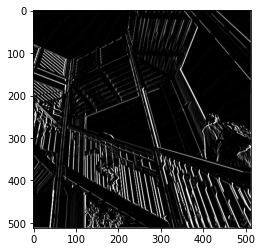

In [33]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

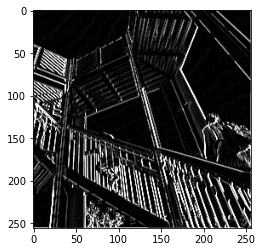

In [38]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2): # Step by 2 at each iteration.
    for y in range(0, size_y, 2): # Step by 2 at each iteration.~
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])

    # x and y will be even, so values are allocated correctly to the new image.
        newImage[int(x/2),int(y/2)] = weight *max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()